In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
plt.rcParams['figure.figsize'] = [15,8]

In [2]:
df=pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave   NaN      Reg   
1   2          20       RL    80.000000     9600   Pave   NaN      Reg   
2   3          60       RL    68.000000    11250   Pave   NaN      IR1   
3   4          70       RL    60.000000     9550   Pave   NaN      IR1   
4   5          60       RL    84.000000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0  196.000000        Gd        TA      PConc       Gd       TA           No   
1    0.000000        TA        TA     CBlock       Gd       TA           Gd   
2  162.000000        Gd        TA      PConc       Gd       TA           Mn   
3    0.000000        TA        TA     BrkTil       TA       Gd           No   
4  350.000000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
len(df)

1460

In [4]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# Percent of misssing values

In [5]:
a=pd.DataFrame((df.isnull().sum()/len(df))*100,columns=['Percentage of missing values'])
#We drop all the variables which has more than 70% of missing values,because we won't get much info out of it
col=list(a.index)
for i in range(len(df.columns)):
    if a.iloc[i,0]>70:
        df.drop(col[i],axis=1,inplace=True)

# Categorical and numerical variables

In [6]:
df_num=df.select_dtypes(np.number)#numerical variables
df_cat=df.select_dtypes('object')#categorical variables

# Treat missing values

In [7]:
df_cat.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

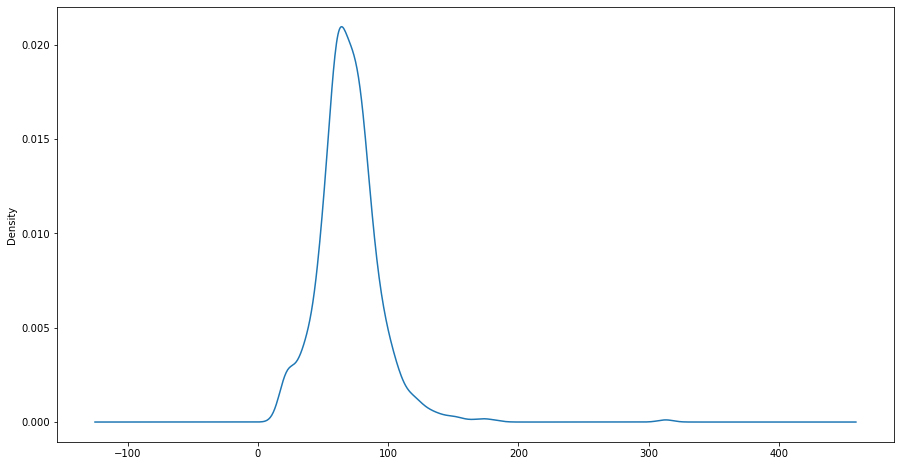

In [8]:
df_num['LotFrontage'].plot(kind='kde')

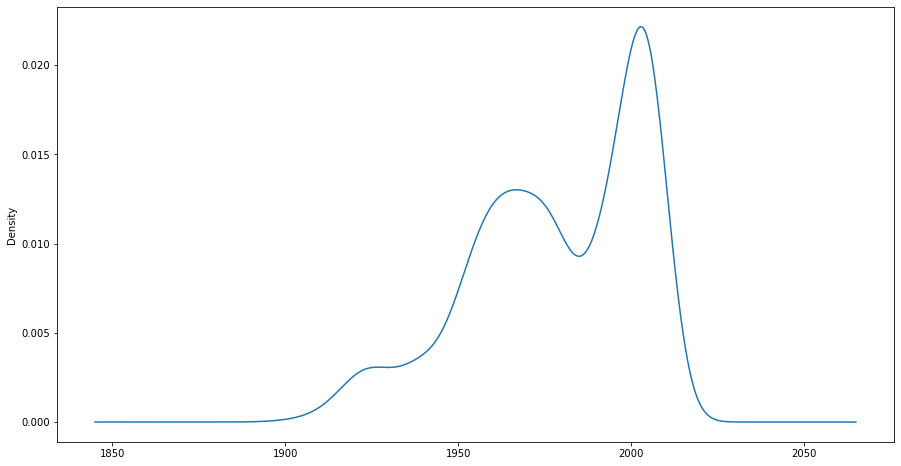

In [9]:
df_num['GarageYrBlt'].plot(kind='kde')

In [10]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(strategy='median')
df_num[['GarageYrBlt','LotFrontage']]=sim.fit_transform(df_num[['GarageYrBlt','LotFrontage']])
#for numerical variables used median to fill in the null values since both are skewed

In [11]:
sim1=SimpleImputer(strategy='most_frequent')
df_cat.iloc[:,20:25]=sim1.fit_transform(df_cat.iloc[:,20:25])
df_cat.iloc[:,32:36]=sim1.fit_transform(df_cat.iloc[:,32:36])
df_cat['Electrical'].fillna(value=df_cat['Electrical'].mode(),inplace=True)
#using mode value to fill the missing values in categorical columns

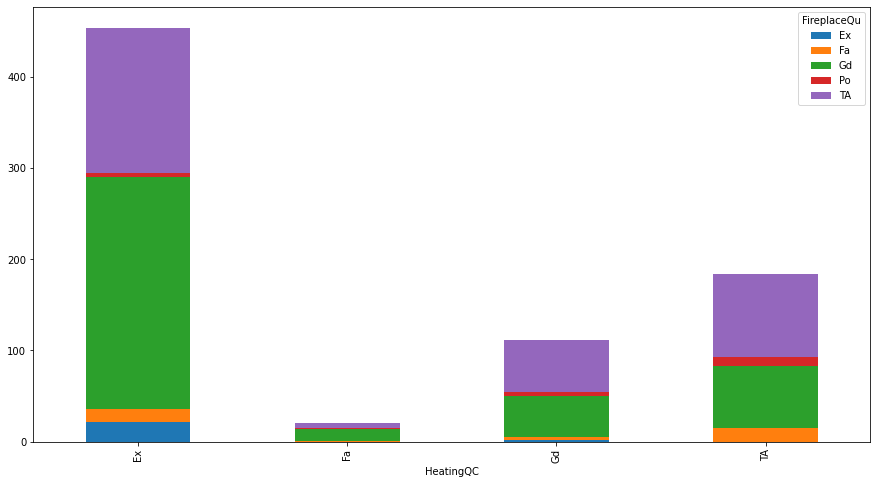

In [12]:
a=pd.crosstab(df_cat.HeatingQC,df_cat.FireplaceQu)
a.plot.bar(stacked=True)

In [13]:
ind=np.where(df_cat['FireplaceQu'].isnull())[0]
for i in ind:
    if df_cat.loc[i,'HeatingQC']=='Gd':
        df_cat.loc[i,'FireplaceQu']='TA'
    if df_cat.loc[i,'HeatingQC']=='TA':
        df_cat.loc[i,'FireplaceQu']='TA'
    else:
        df_cat.loc[i,'FireplaceQu']='Gd'
# for fireplaceQU used the HeatingQC as reference to fill missing values

In [14]:
dfh=pd.concat([df_cat,df_num],axis=1)

# Outliers treatment

In [25]:
from scipy.stats.mstats import winsorize

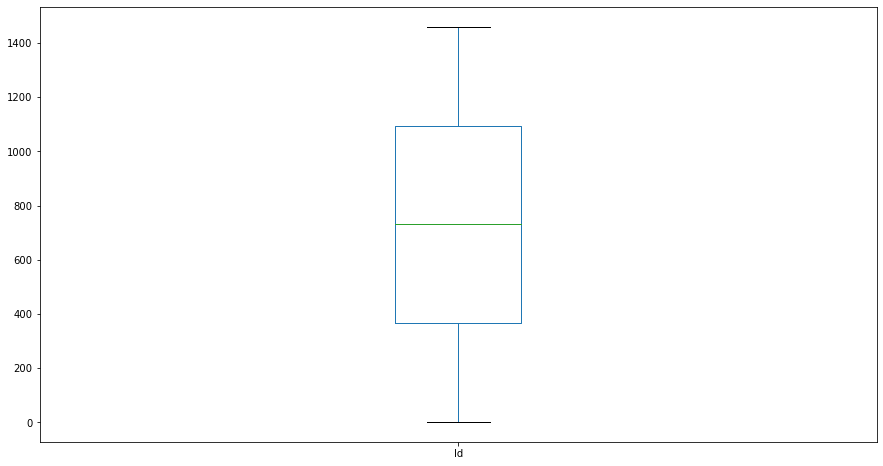

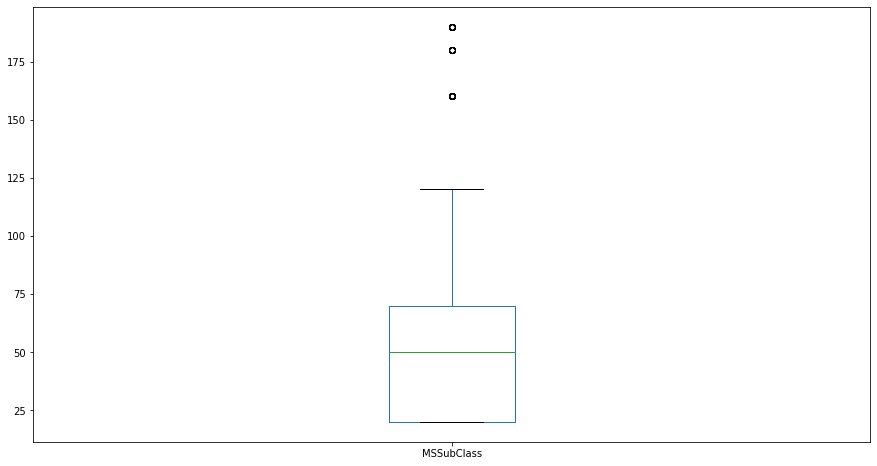

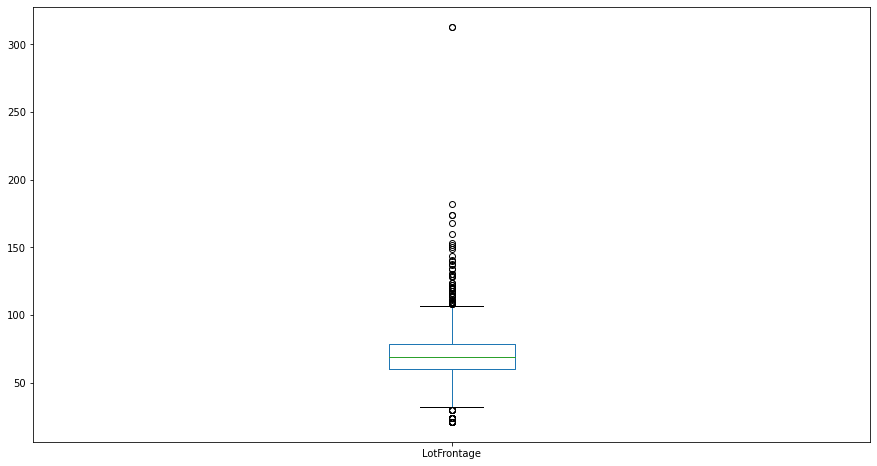

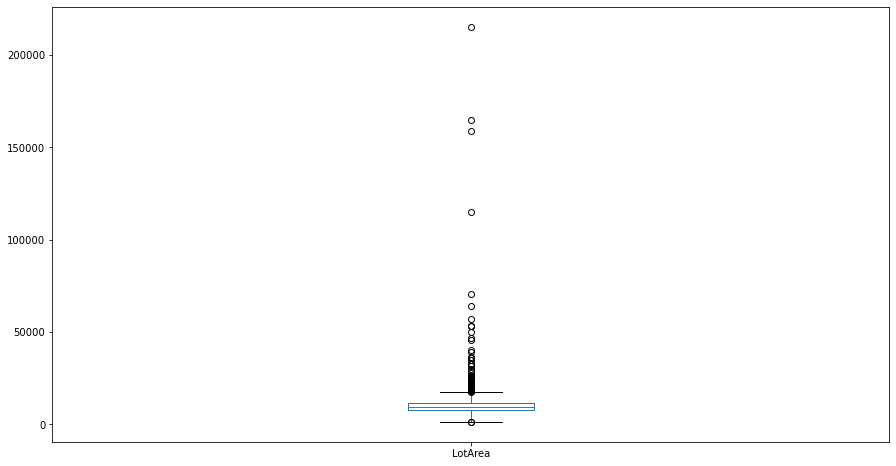

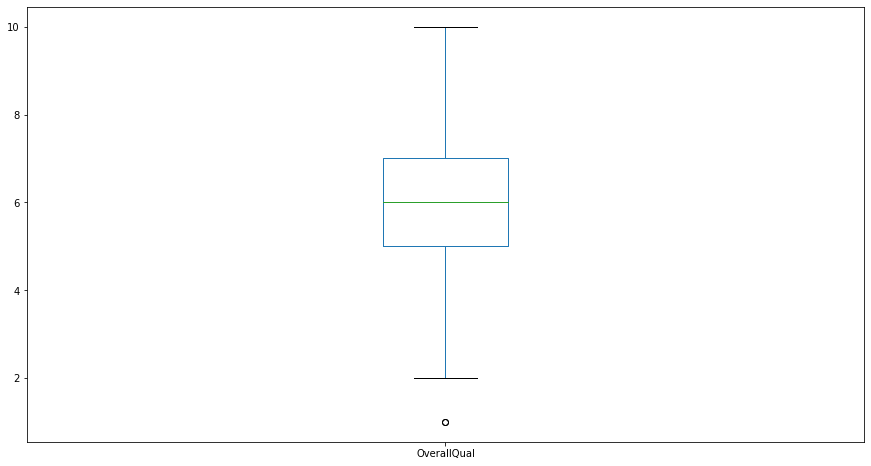

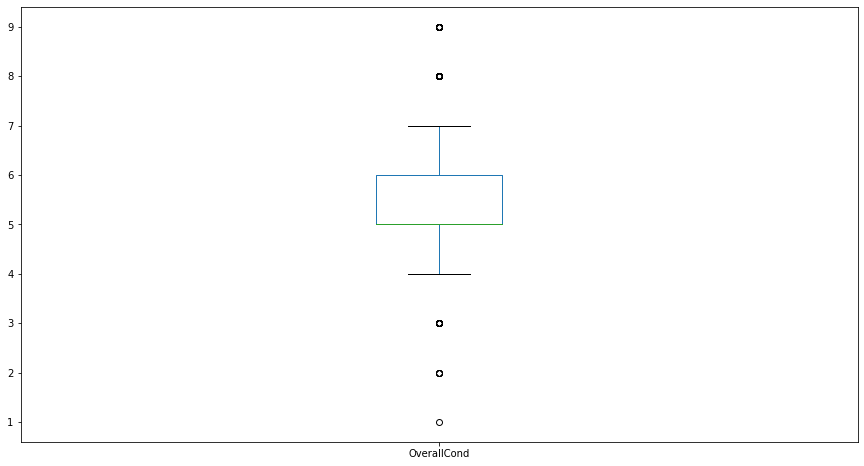

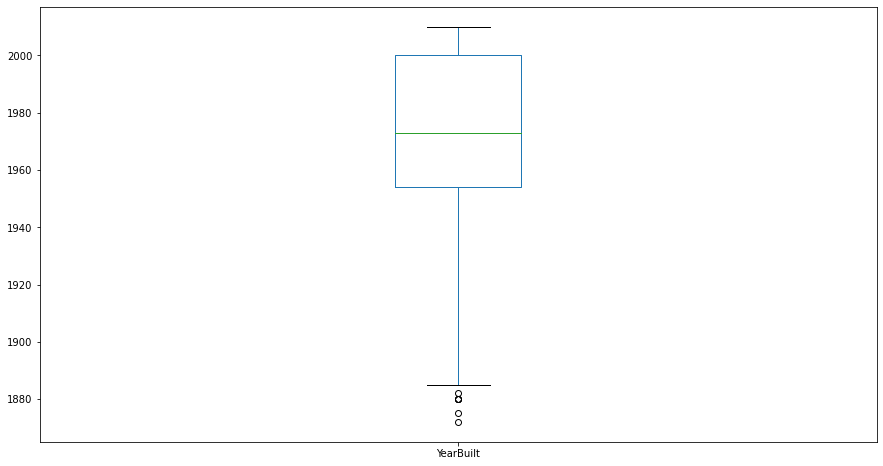

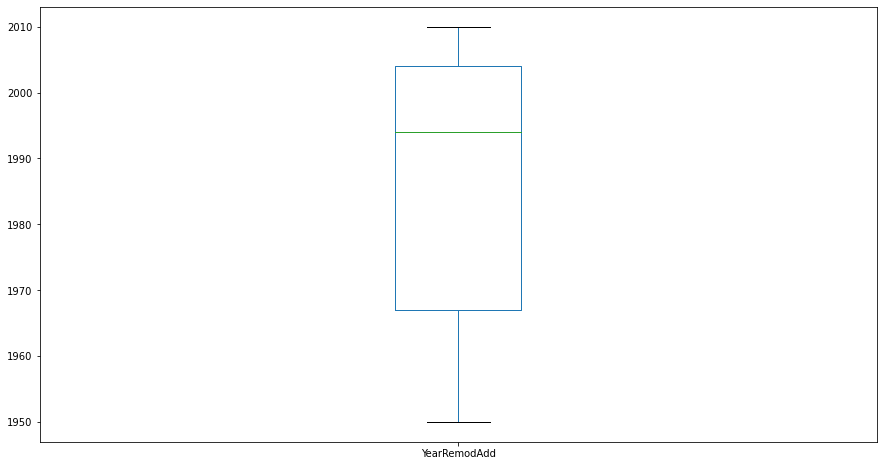

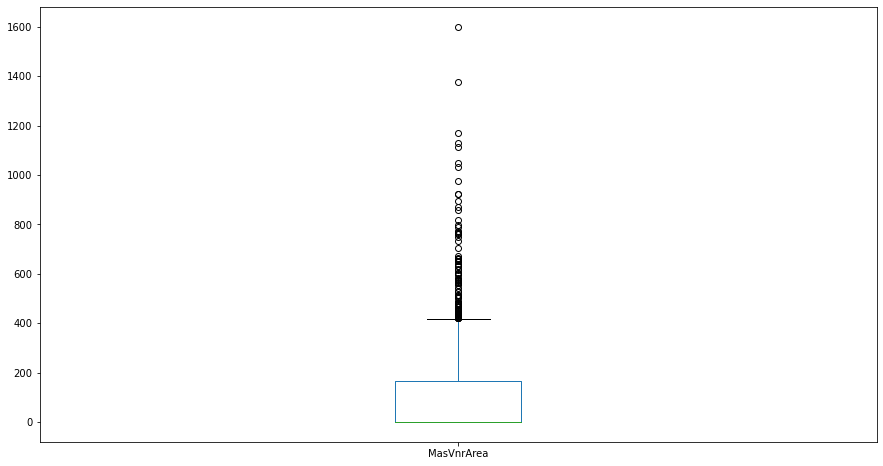

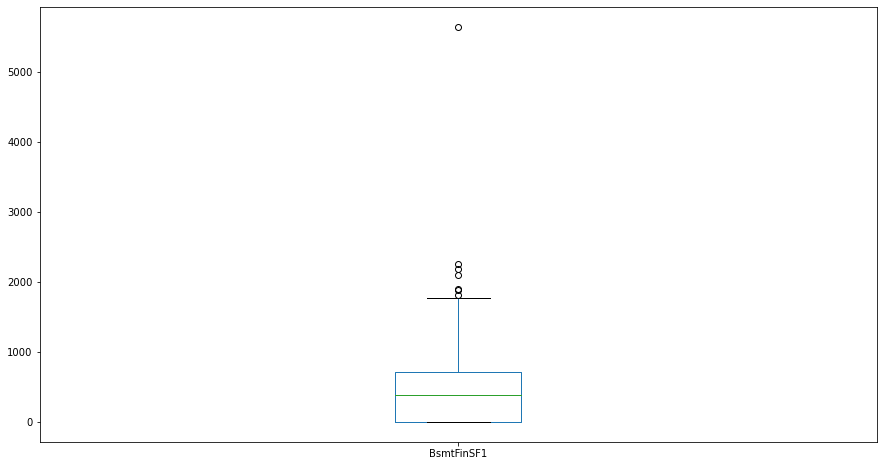

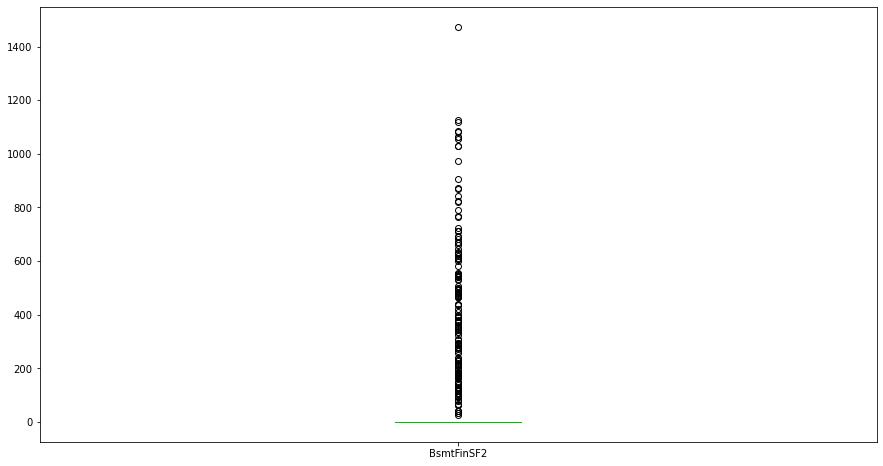

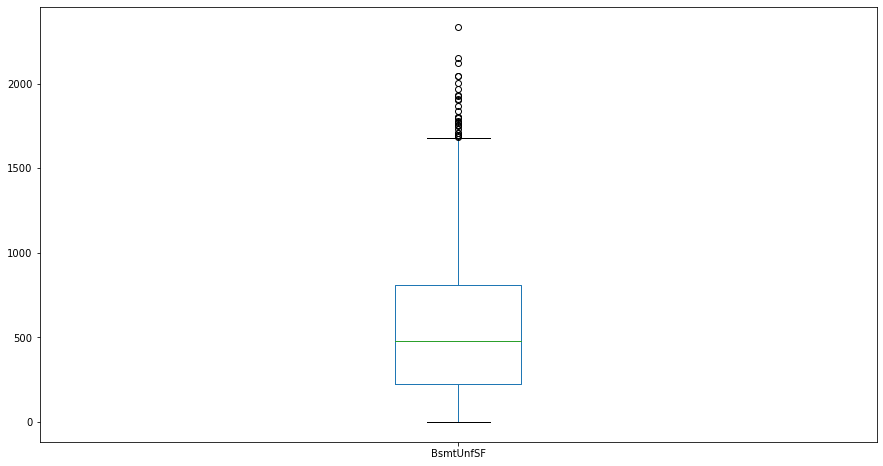

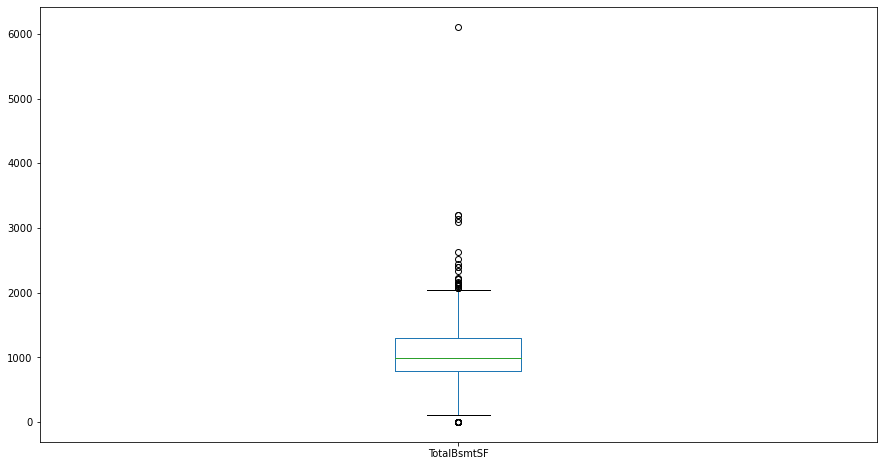

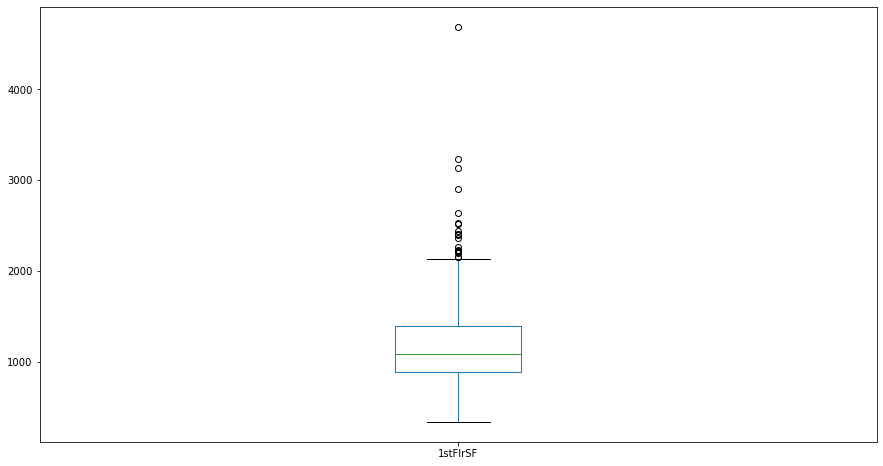

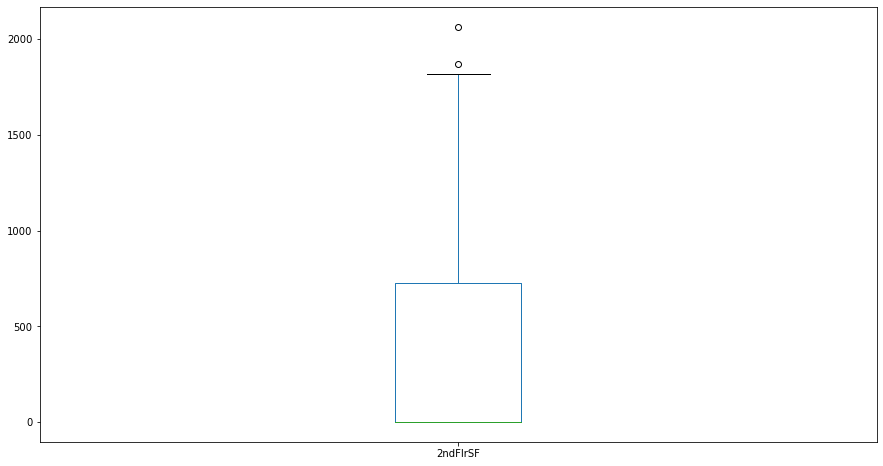

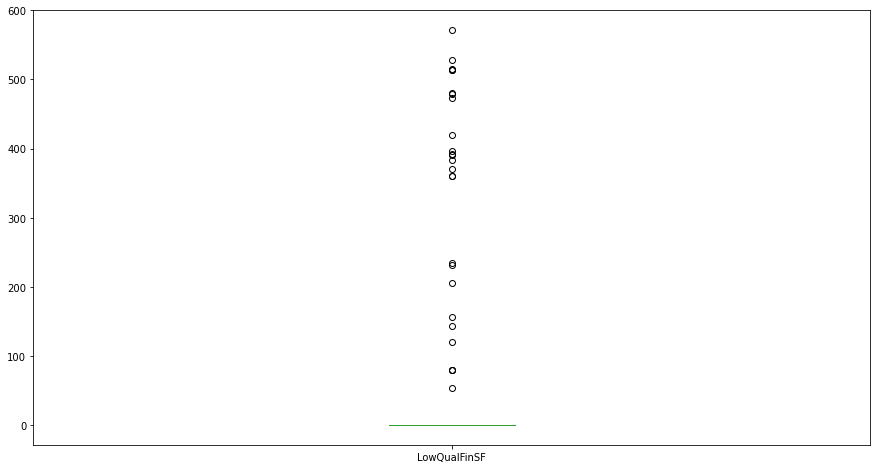

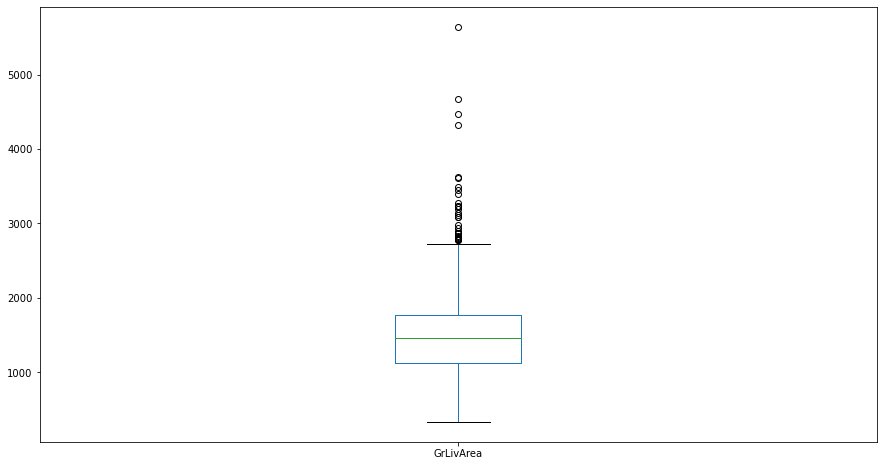

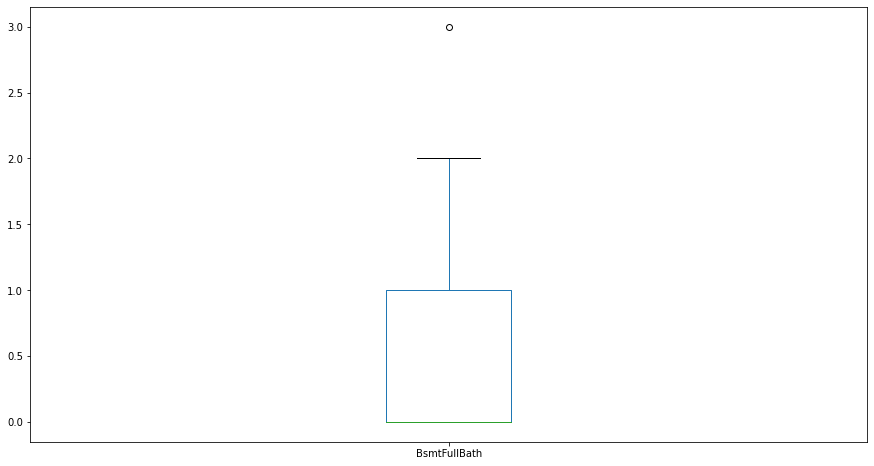

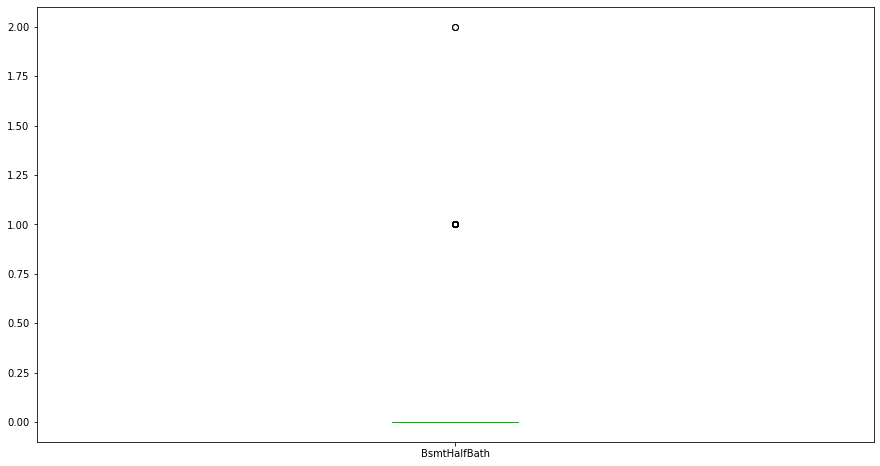

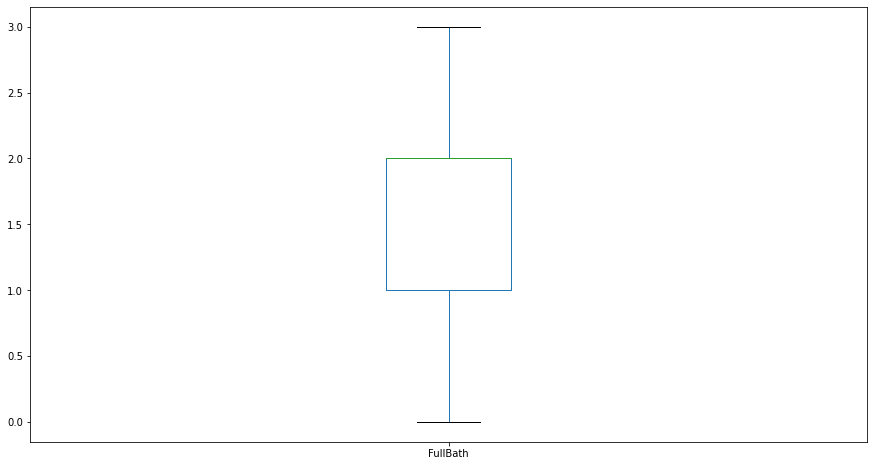

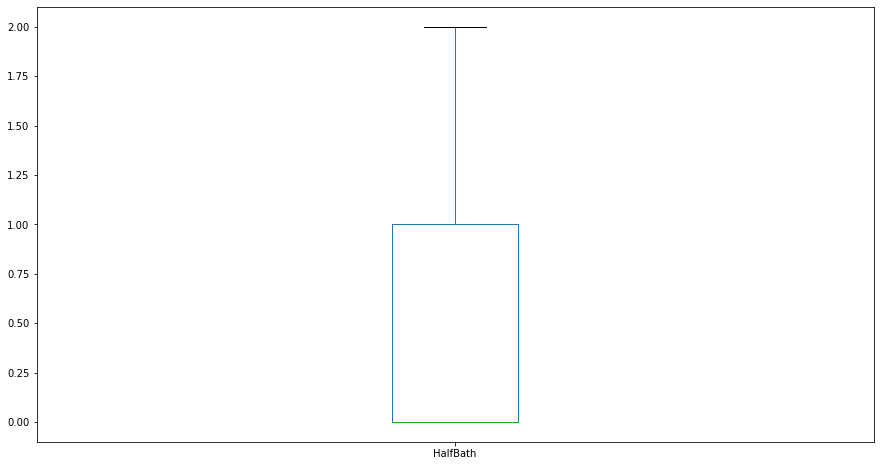

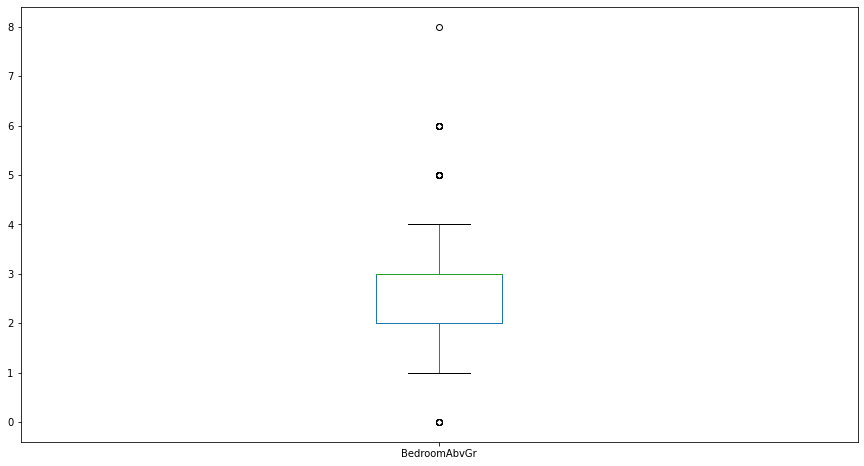

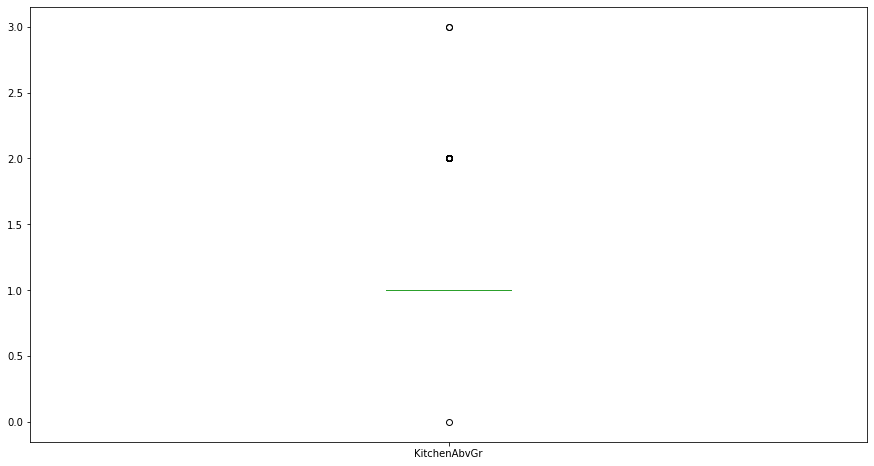

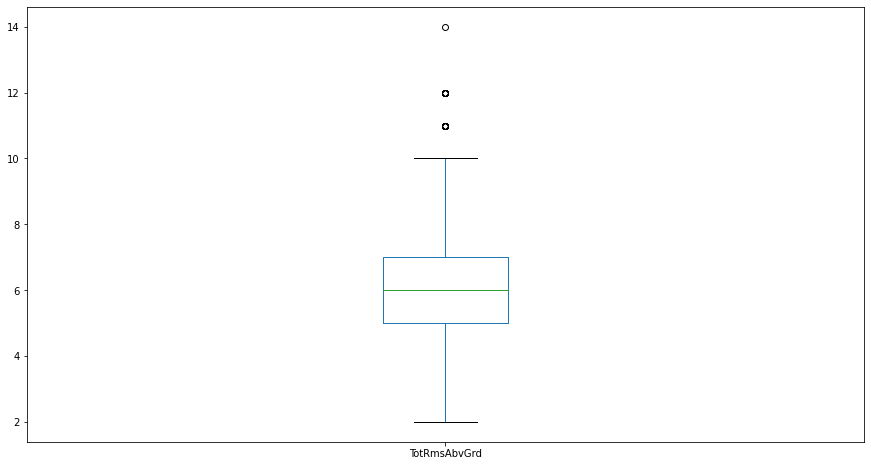

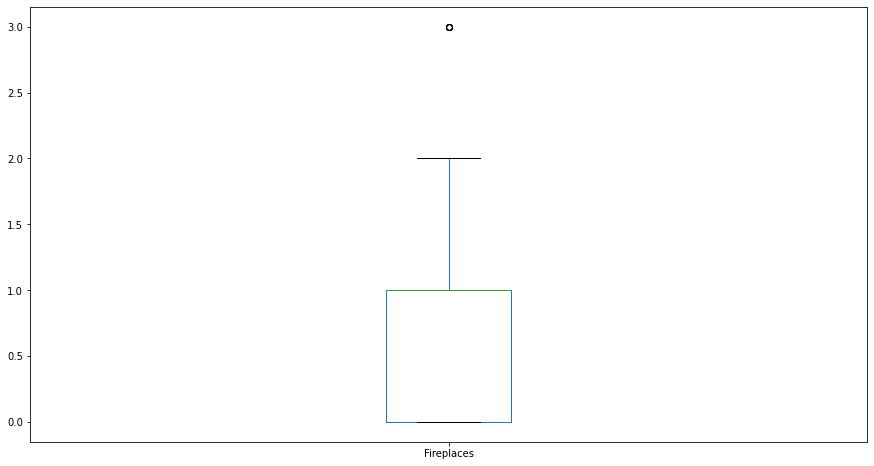

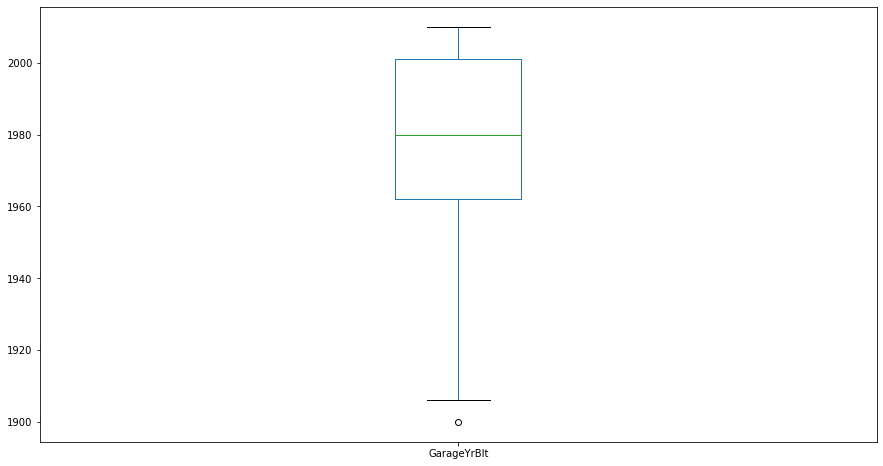

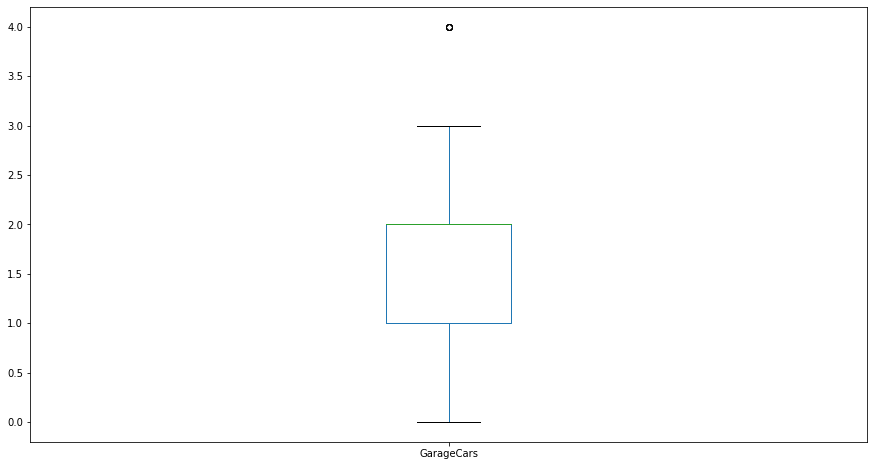

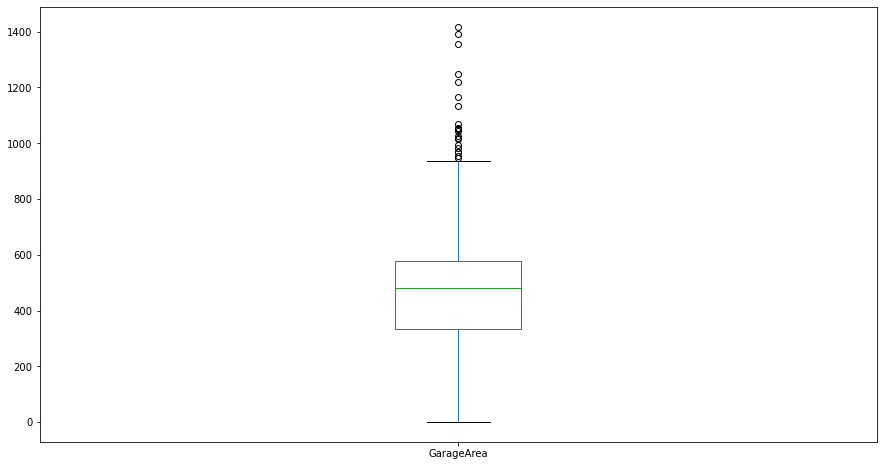

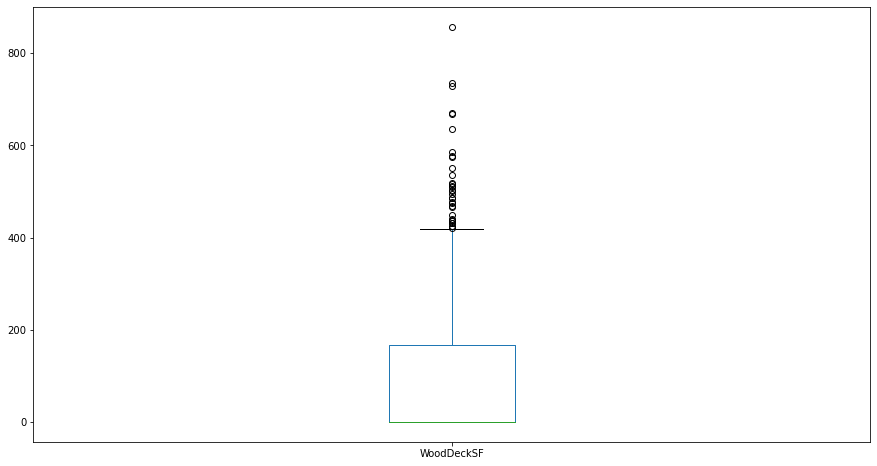

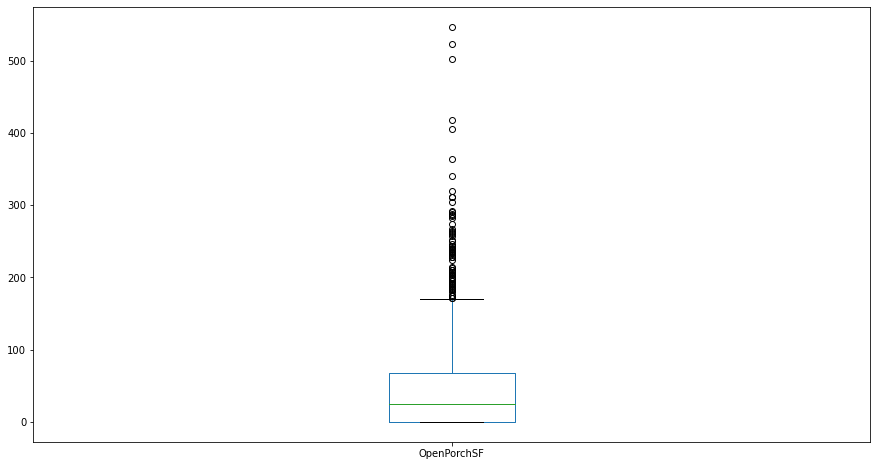

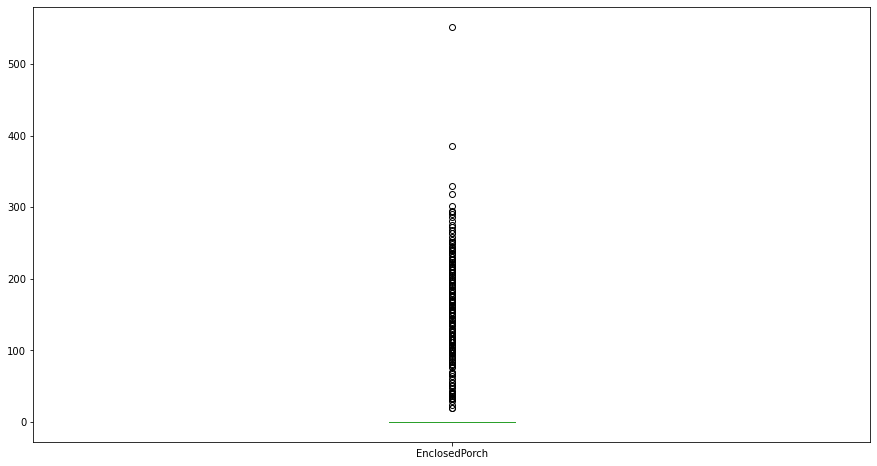

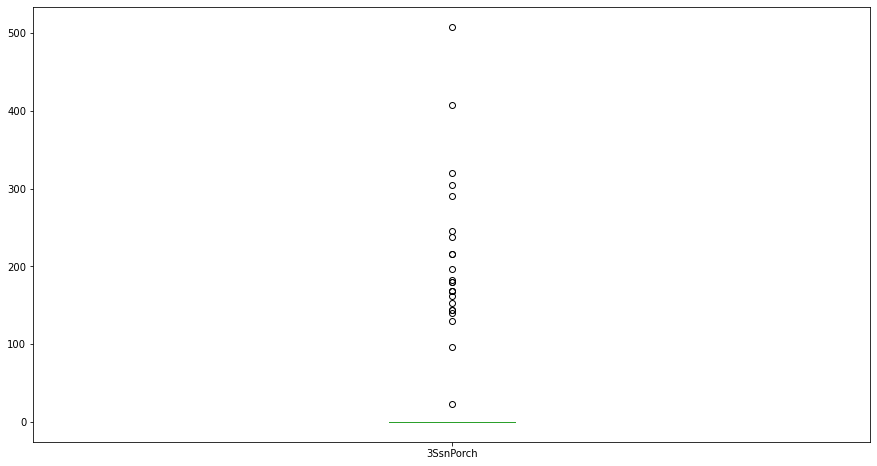

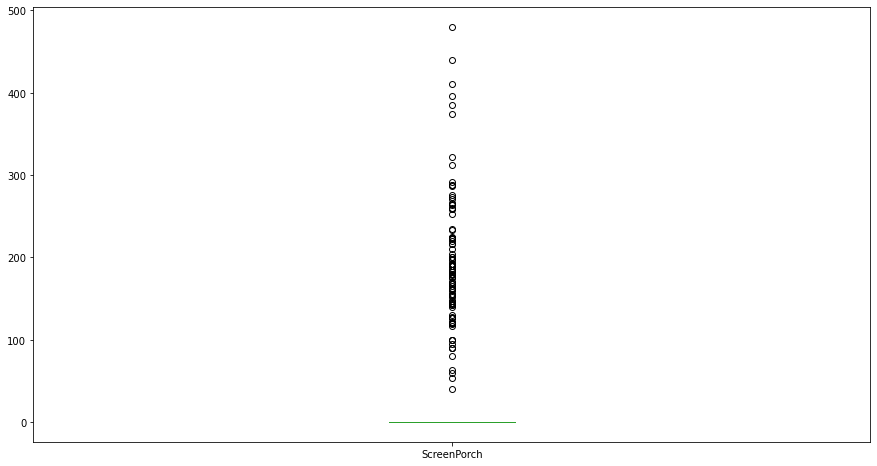

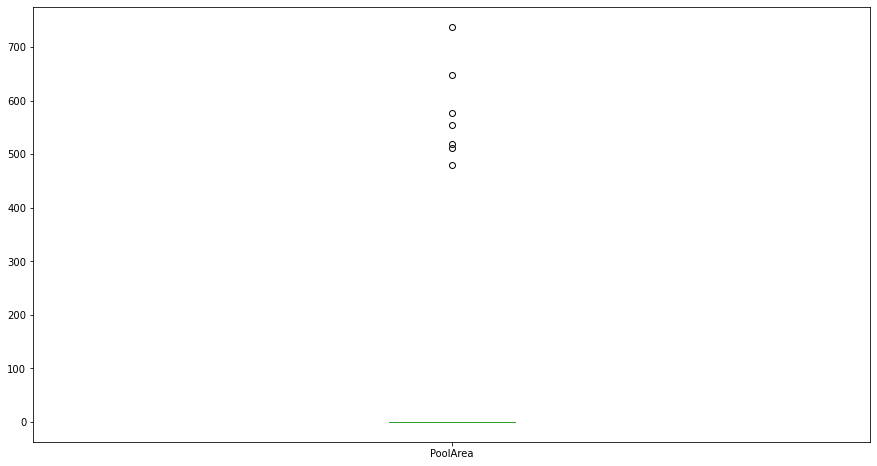

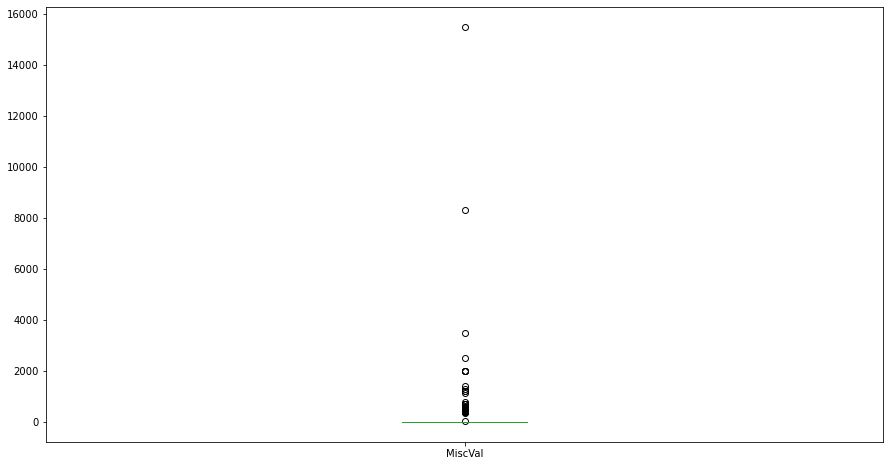

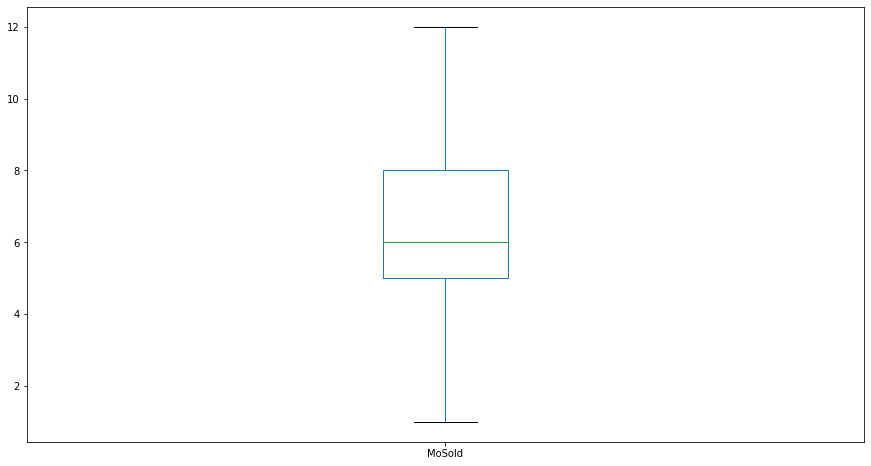

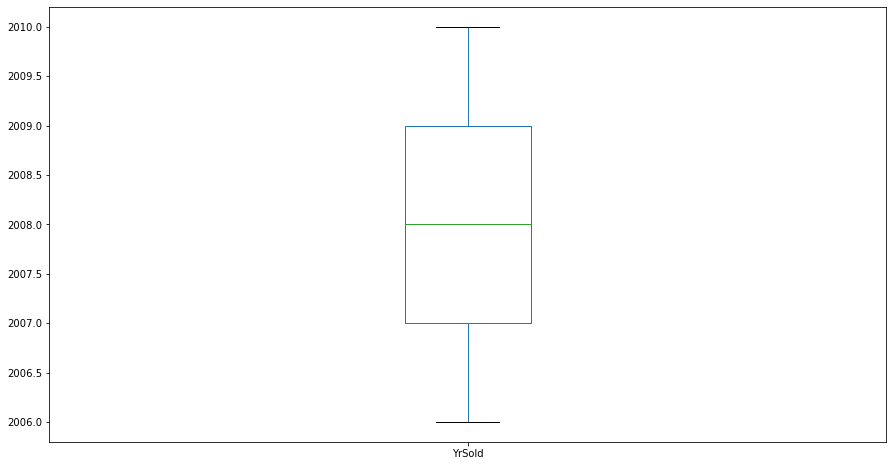

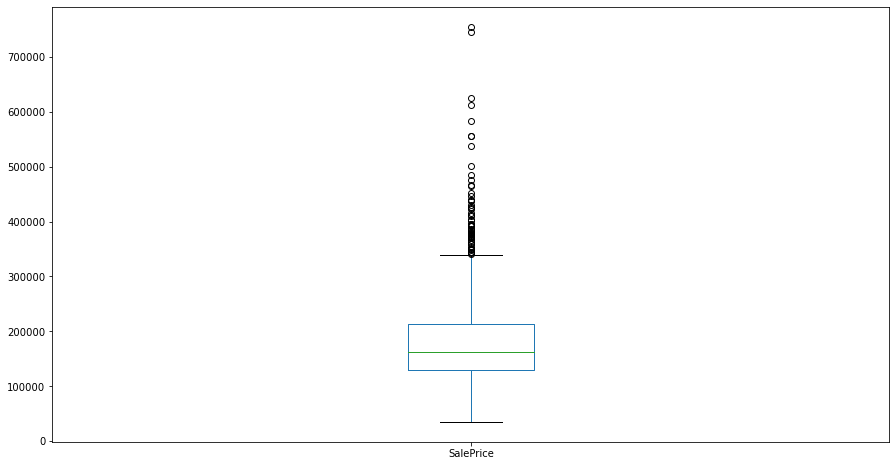

In [15]:
for i in df_num.columns:
    df_num[i].plot(kind='box')
    plt.show()

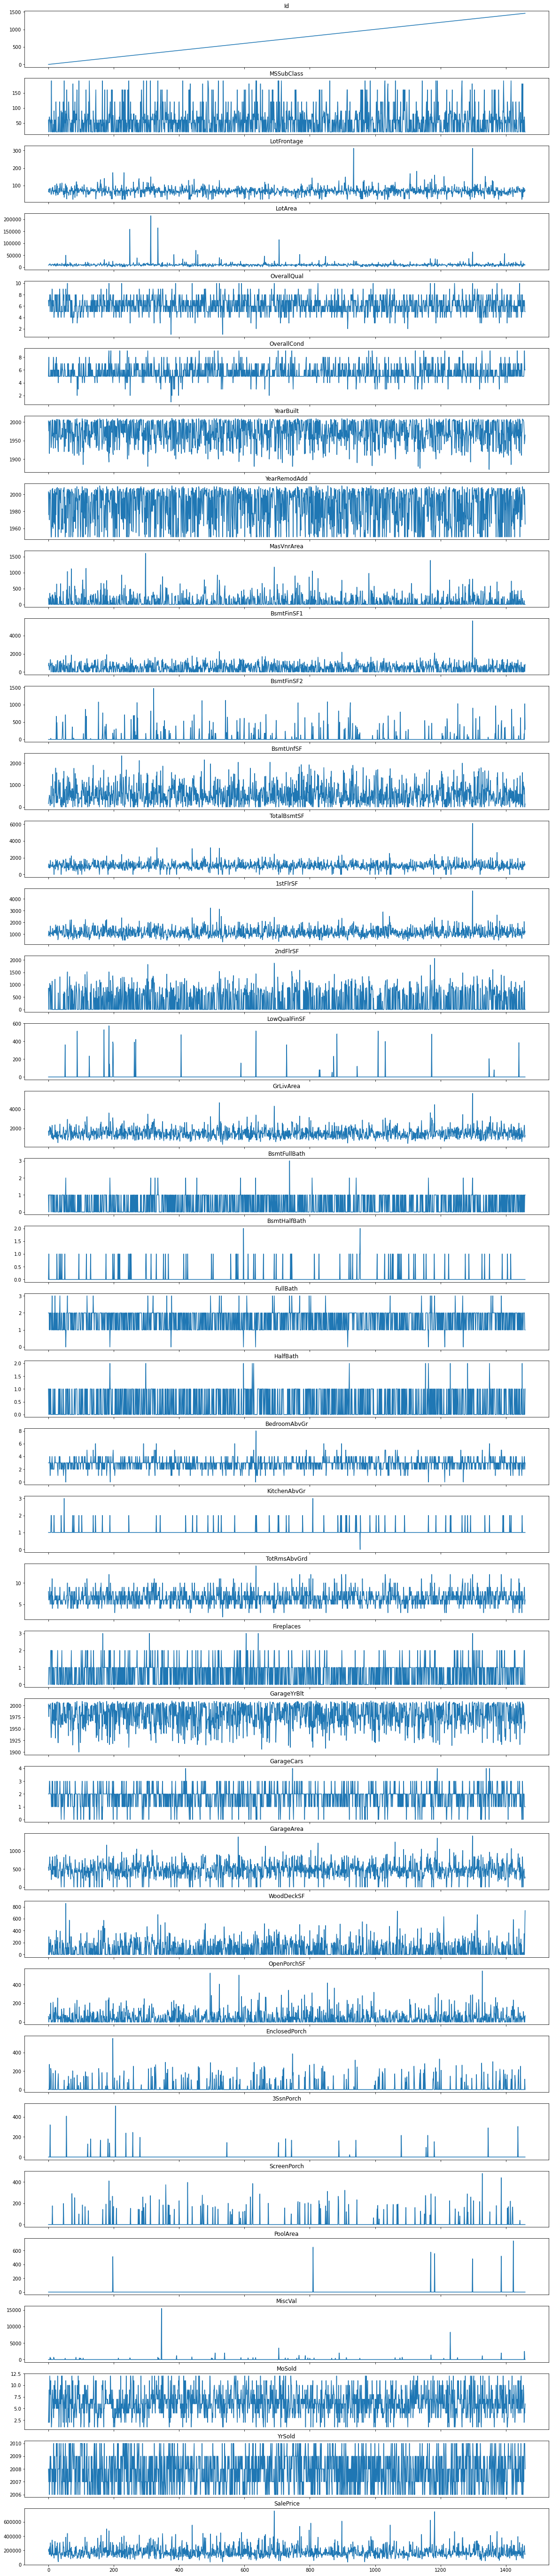

In [18]:
columns = list(df_num.columns)
fig, ax = plt.subplots(nrows=len(columns), ncols=1, sharex=True, figsize=(20,100))
for i in range(len(columns)):
    ax[i].plot(df_num[columns[i]])
    ax[i].set_title(columns[i])

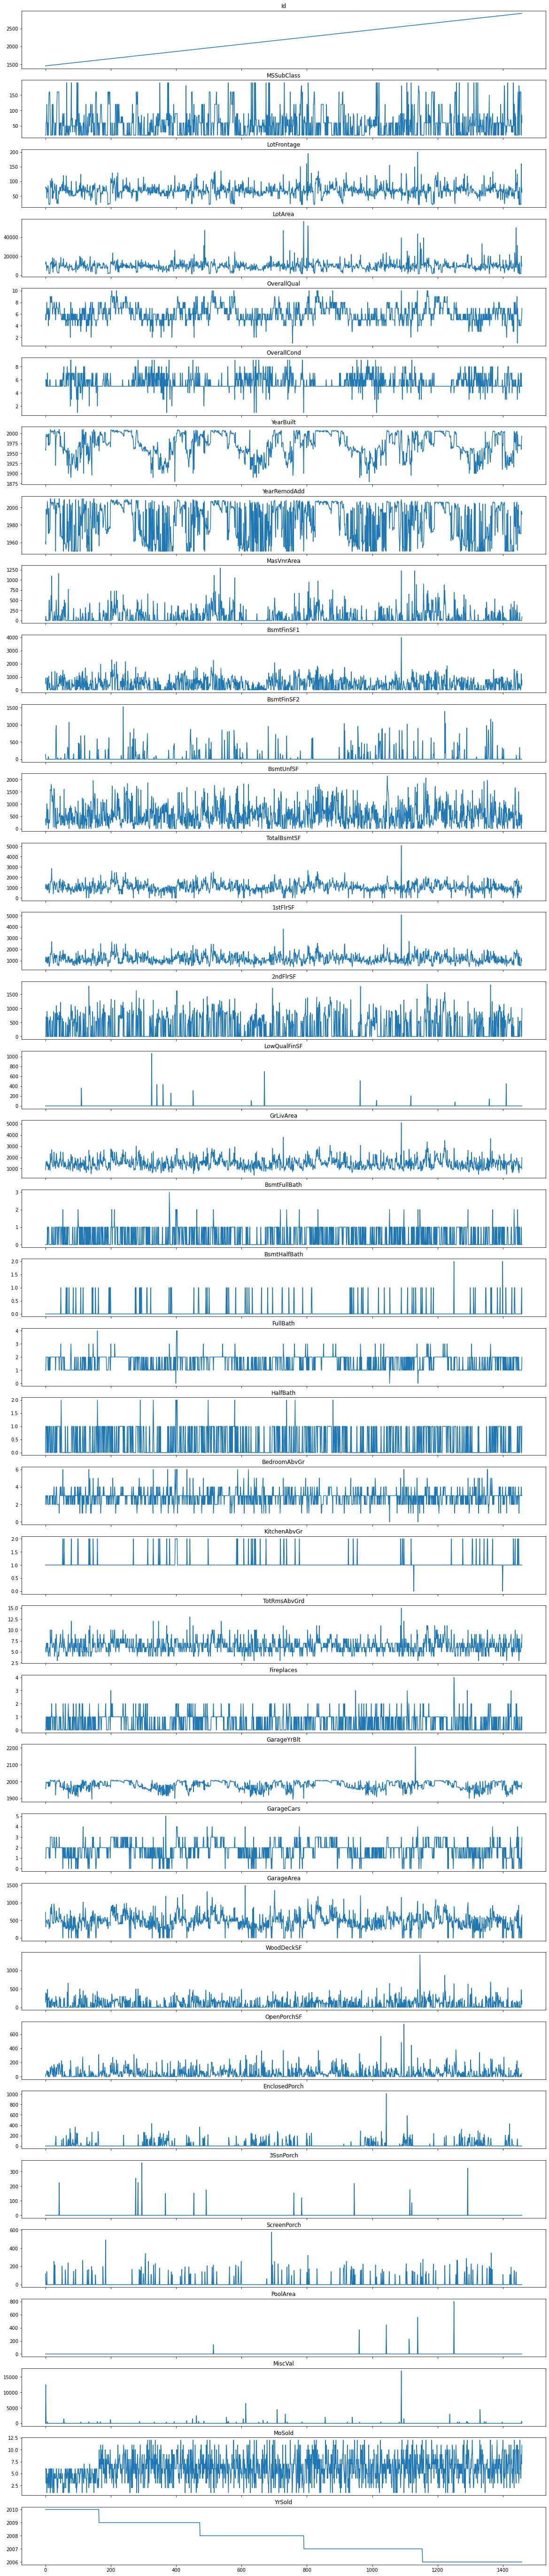

In [30]:
columns = list(df_numtest.columns)
fig, ax = plt.subplots(nrows=len(columns), ncols=1, sharex=True, figsize=(20,100))
for i in range(len(columns)):
    ax[i].plot(df_numtest[columns[i]])
    ax[i].set_title(columns[i])

In [16]:
df_num1=dfh.copy()
df_num1=df_num1[df_num1['LotFrontage']<200]
df_num1=df_num1[df_num1['LotArea']<80000]
df_num1=df_num1[df_num1['MasVnrArea']<1400]
#df_num1=df_num1[df_num1['BsmtFinSF1']<5000]
#df_num1=df_num1[df_num1['1stFlrSF']<4000]
#df_num1=df_num1[
#df_num1['TotalBsmtSF']<4000]
#df_num1=df_num1[df_num1['2ndFlrSF']<1700]
#df_num1=df_num1[df_num1['GrLivArea']<4500]
#df_num1=df_num1[df_num1['WoodDeckSF']<800]
#df_num1=df_num1[df_num1['OpenPorchSF']<400]
#df_num1=df_num1[df_num1['EnclosedPorch']<400]
df_num1=df_num1[df_num1['3SsnPorch']<300]

#remove id,pool area,MiscVal

In [17]:
df_num1.drop(['Id','MiscVal'],axis=1,inplace=True)
df_num1.reset_index(inplace=True,drop=True)
df_num1.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          Gd     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0          RFn         TA         TA          Y       WD        Normal   
1          RFn         TA         TA          Y       WD        Normal   
2          RFn         TA         TA          Y       WD        Normal   
3          Unf         TA         TA          Y       WD       Abnorml   
4          RFn         TA         TA          Y       WD        Normal   

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60    65.000000     8450            7            5       2003   
1          20    80.000000     9600            6            8       1976   
2          60    68.000000    11250            7            5       2001   
3          70    60.000000     9550            7            5       1915   
4          60    84.000000    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003  196.000000         706           0        150          856   
1          1976    0.000000         978           0        284         1262   
2          2002  162.000000         486           0        434          920   
3          1970    0.000000         216           0        540          756   
4          2000  350.000000         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717            

In [18]:
df_num1.dropna(inplace=True)

In [19]:
df_num1[['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold','YrSold']]=df_num1[['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold','YrSold']].astype('object')
#covert to object

df_num1=df_num.copy()
df_num1['LotArea']=winsorize(df_num['LotArea'],limits=[0.05,0.05])
df_num1['MasVnrArea']=winsorize(df_num['MasVnrArea'],limits=[0.05,0.05])
df_num1['SalePrice']=winsorize(df_num['SalePrice'],limits=[0.05,0.05])
df_num1['LotFrontage']=winsorize(df_num['LotFrontage'],limits=[0.05,0.05])
df_num1['BsmtFinSF1']=winsorize(df_num['BsmtFinSF1'],limits=[0.05,0.05])
df_num1['BsmtFinSF2']=winsorize(df_num['BsmtFinSF2'],limits=[0.05,0.05])
df_num1['BsmtUnfSF']=winsorize(df_num['BsmtUnfSF'],limits=[0.05,0.05])
df_num1['2ndFlrSF']=winsorize(df_num['2ndFlrSF'],limits=[0.02,0.02])
df_num1['1stFlrSF']=winsorize(df_num['1stFlrSF'],limits=[0.05,0.05])
df_num1['GrLivArea']=winsorize(df_num['GrLivArea'],limits=[0.05,0.05])
df_num1['TotalBsmtSF']=winsorize(df_num['TotalBsmtSF'],limits=[0.05,0.05])
df_num1['GarageArea']=winsorize(df_num['GarageArea'],limits=[0.05,0.05])
df_num1['WoodDeckSF']=winsorize(df_num['WoodDeckSF'],limits=[0.05,0.05])
df_num1['OpenPorchSF']=winsorize(df_num['OpenPorchSF'],limits=[0.05,0.05])
df_num1['EnclosedPorch']=winsorize(df_num['EnclosedPorch'],limits=[0.05,0.05])

#used winzorisation for outlier treatment

In [20]:
#df_price=pd.concat([df_cat,df_num1],axis=1)
df_price=df_num1.copy()

In [21]:
df_price.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars

# EDA

In [23]:
df_num=df_price.select_dtypes(np.number)
df_cat=df_price.select_dtypes('object')

In [25]:
xed=df_num.drop('SalePrice',axis=1)
yed=df_num['SalePrice']

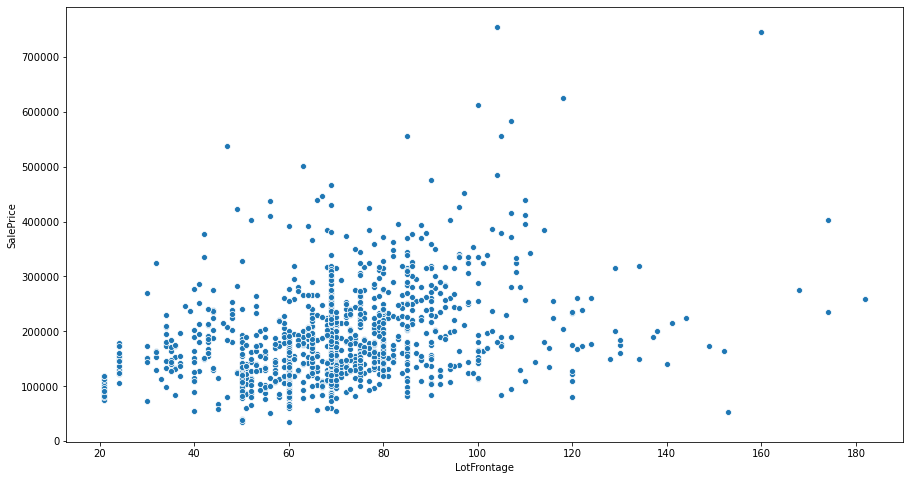

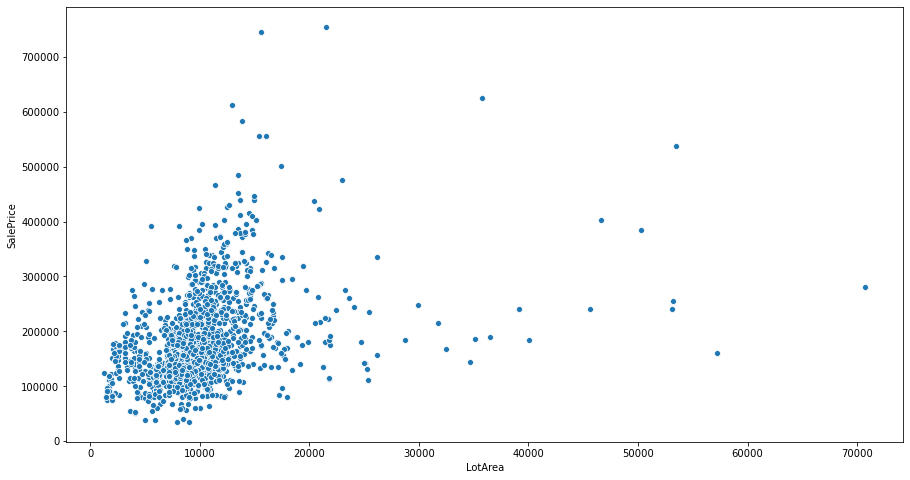

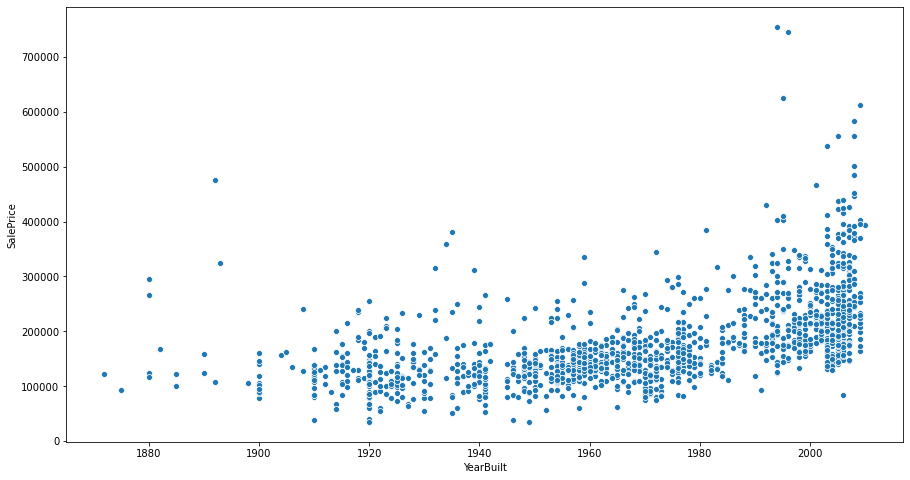

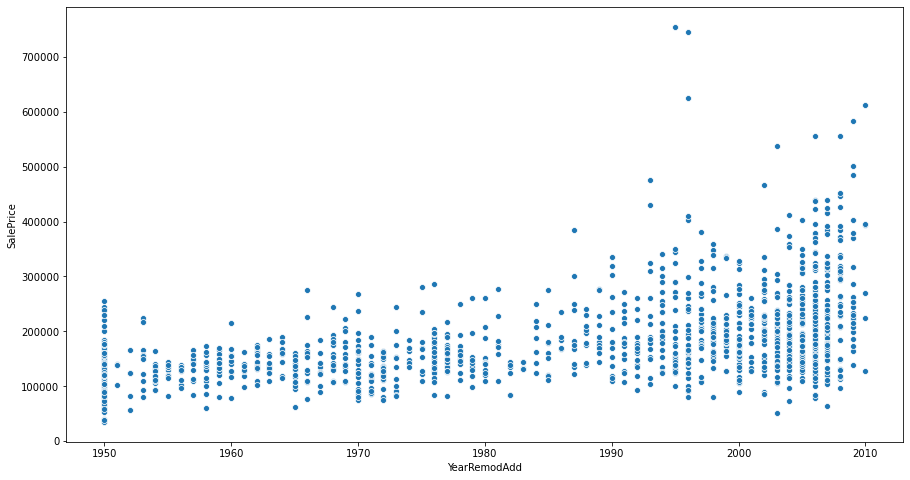

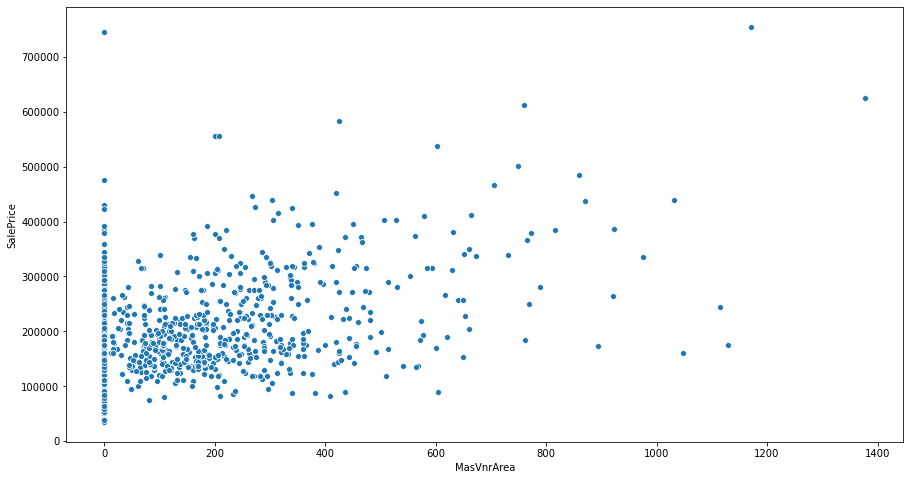

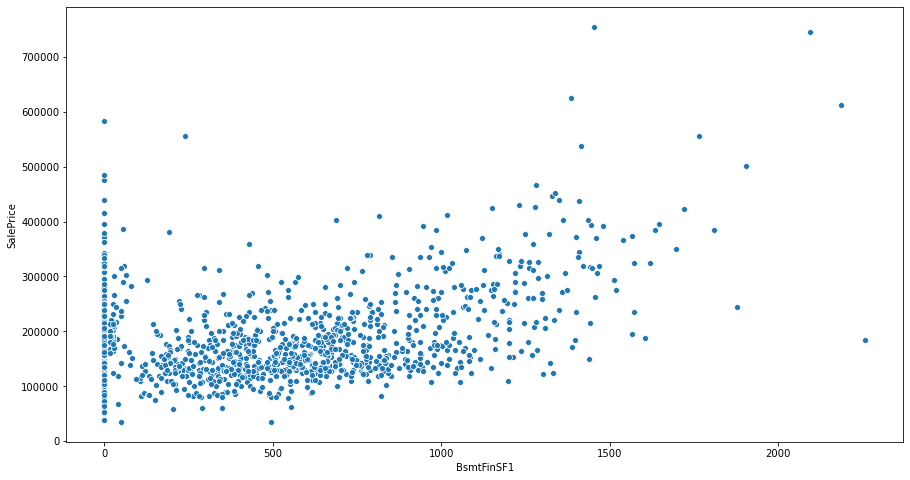

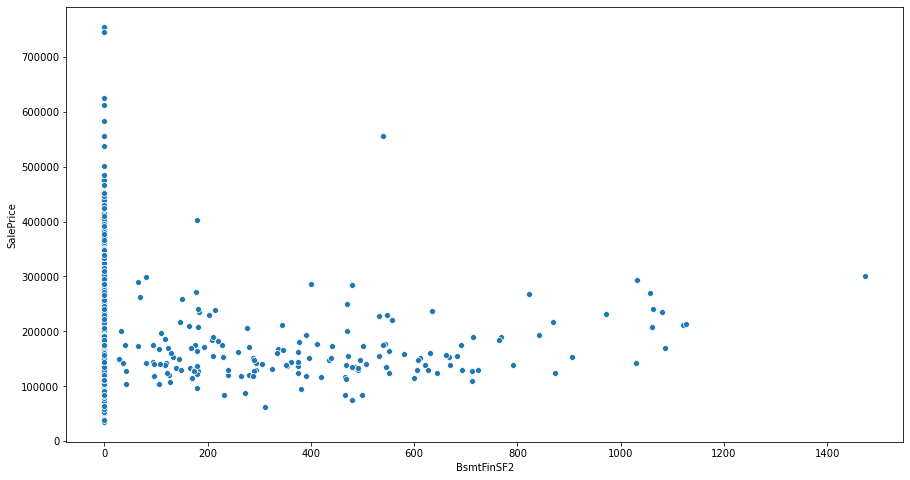

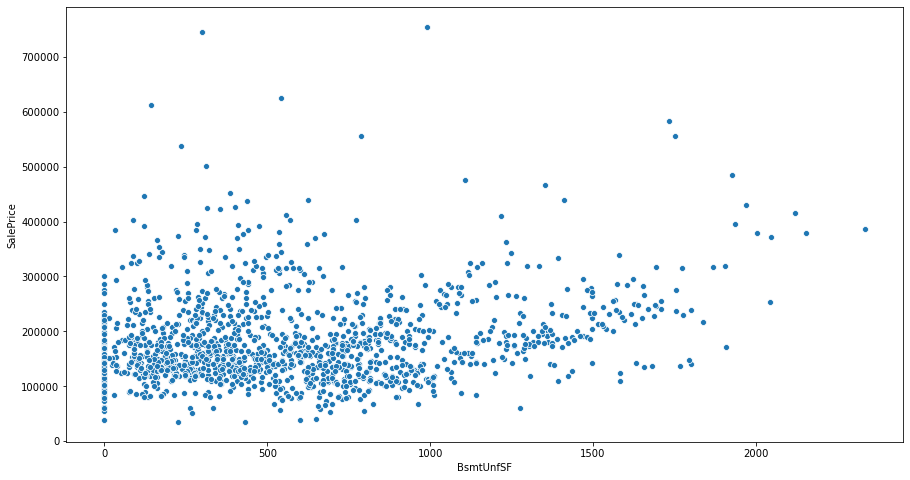

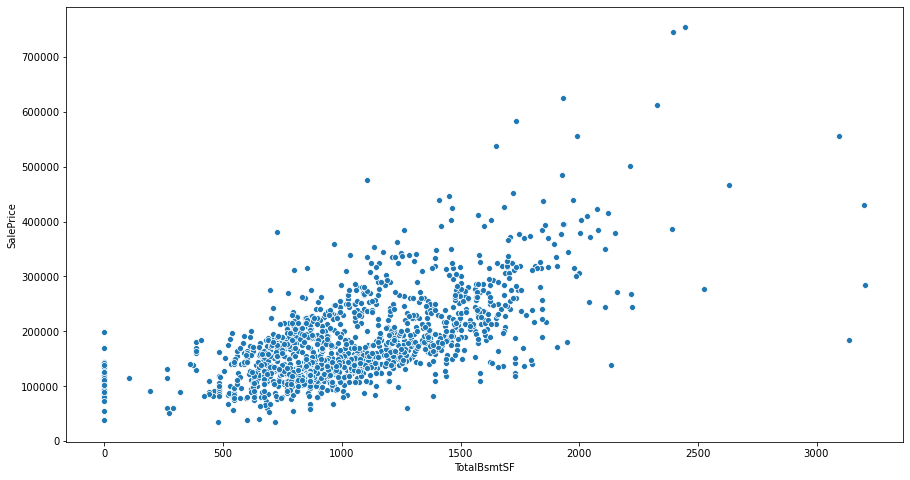

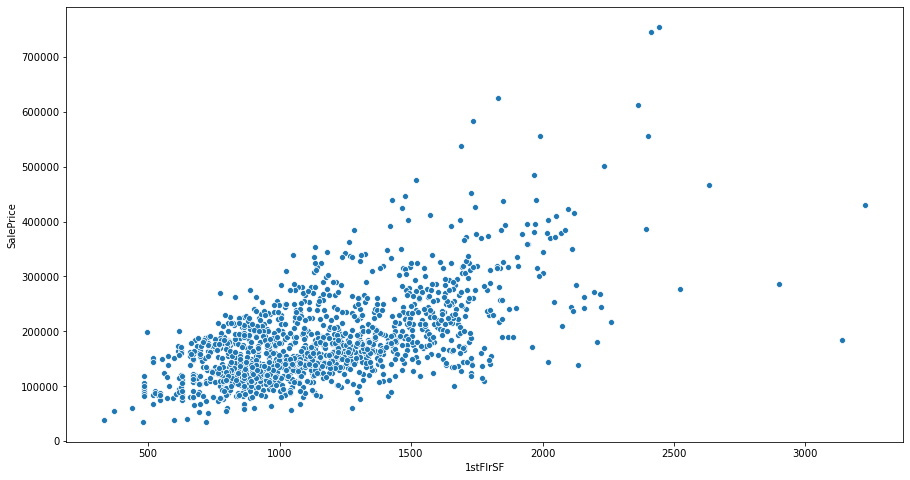

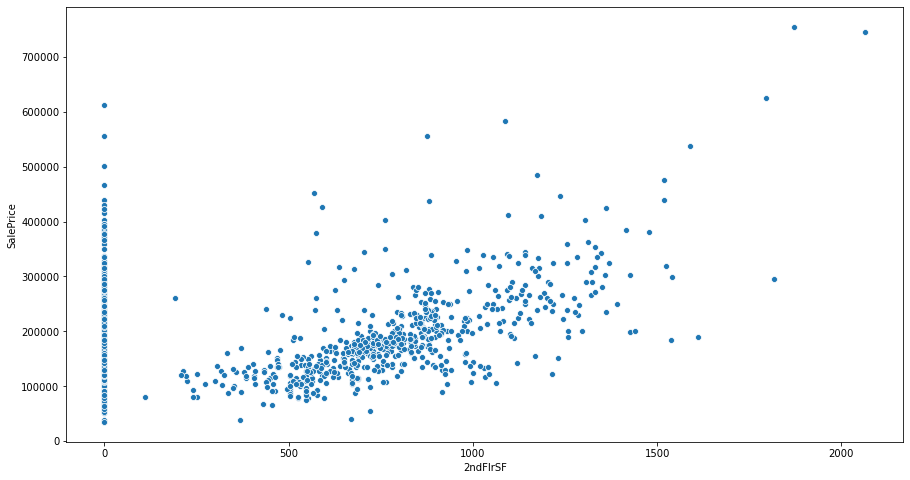

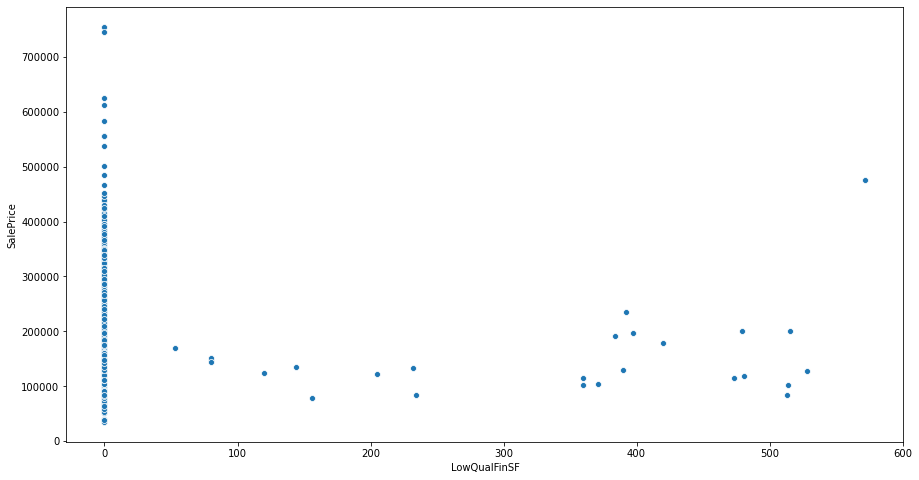

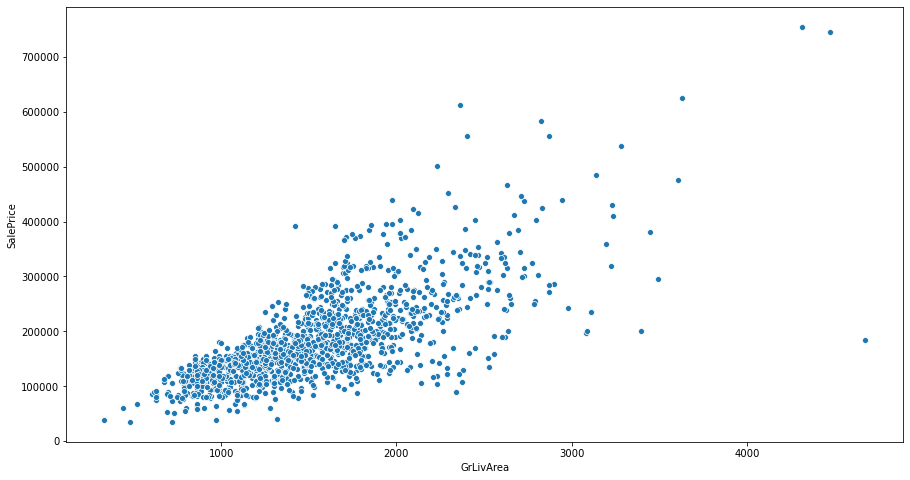

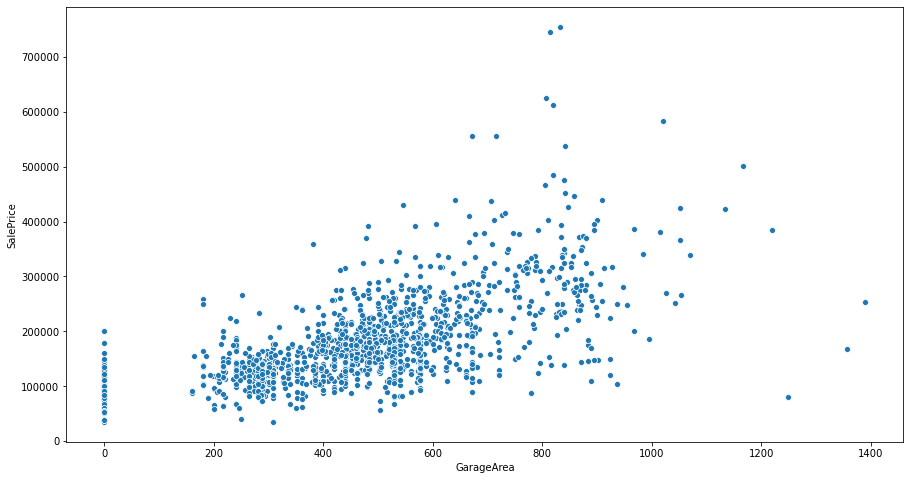

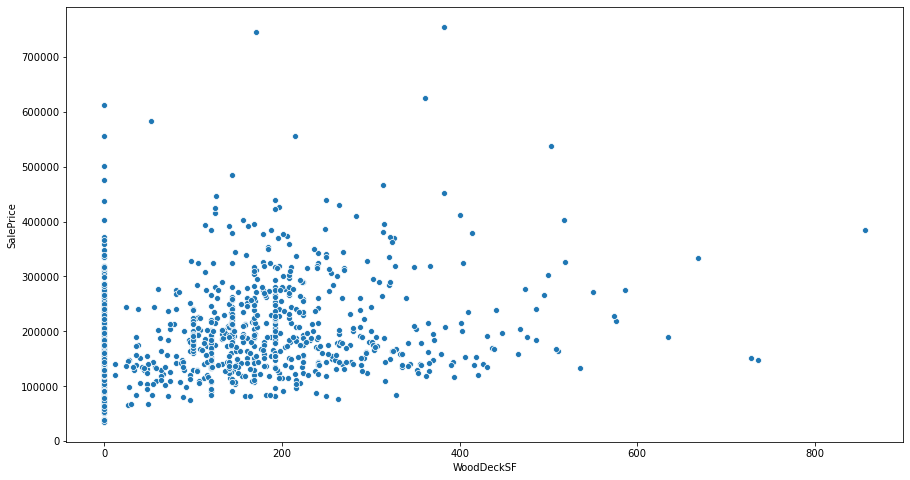

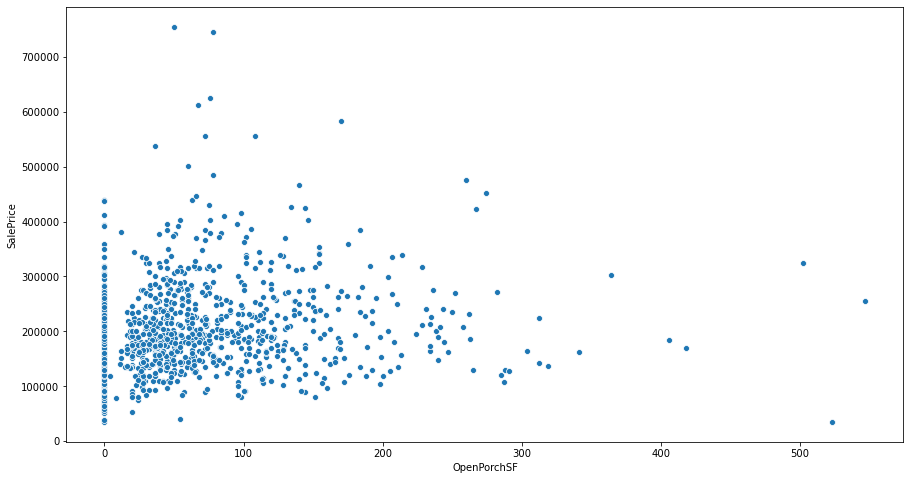

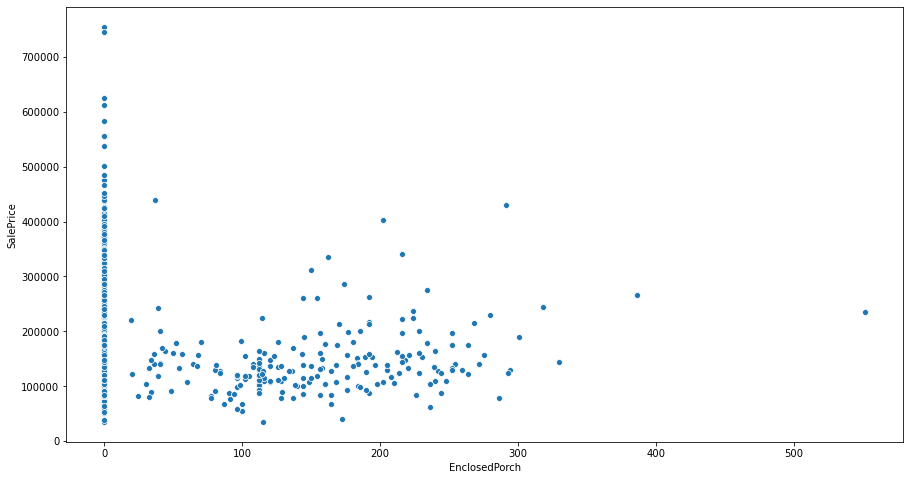

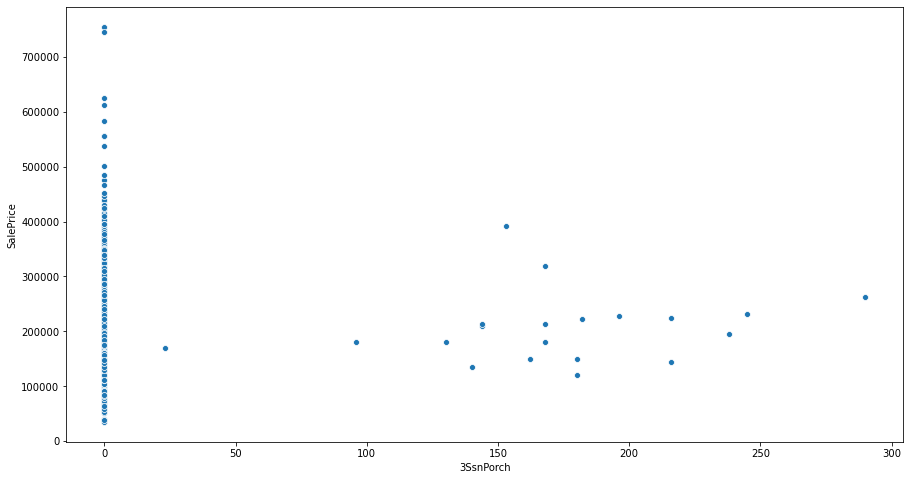

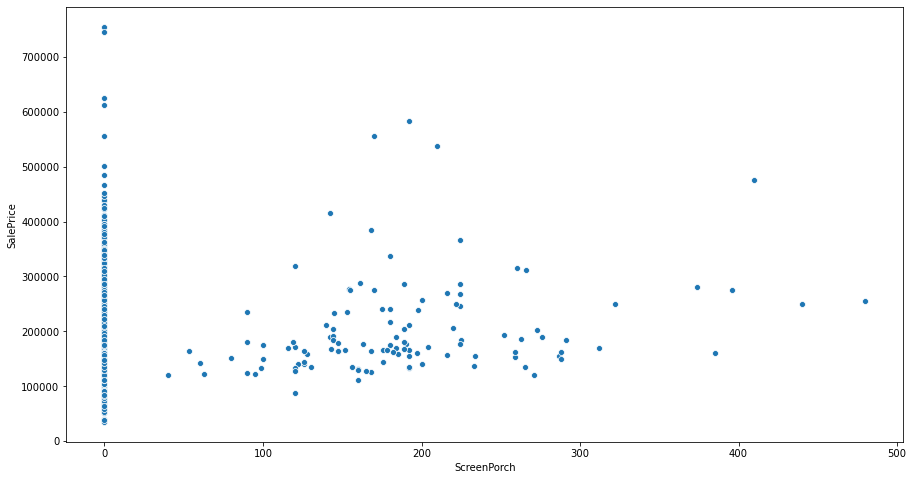

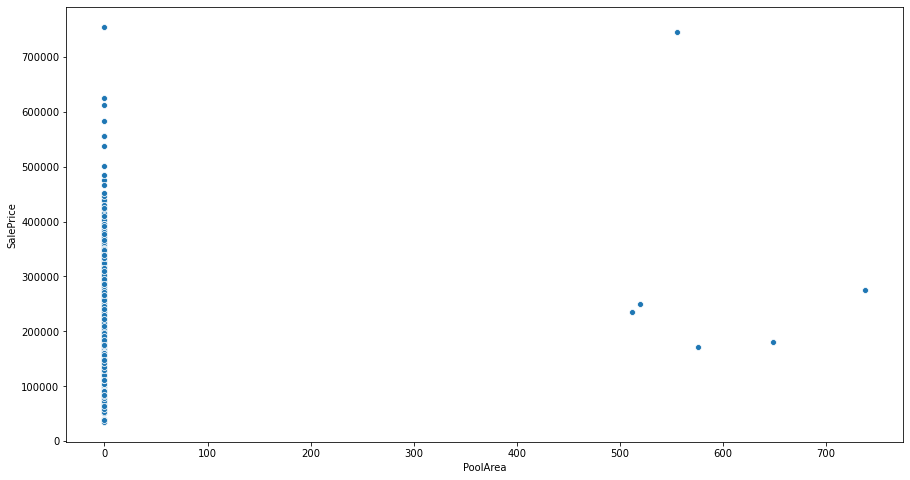

In [27]:
for i in xed.columns:
    sns.scatterplot(xed[i],yed)
    plt.show()

From scatterplot we can see some variables are linearly related to the SalePrice.

# Base model with outliers treated and no feature engineering

In [31]:
#labelencoding categorical variables and using standard scaler
df_num=df_price.select_dtypes(np.number)
df_cat=df_price.select_dtypes('object')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat.columns:
    df_cat[i]=le.fit_transform(df_cat[i])
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mm=MinMaxScaler()
o=df_price['SalePrice']
output=mm.fit_transform(df_num[['SalePrice']])
out=pd.DataFrame(output,columns=['SalePrice'])
df_num_11=df_num.drop('SalePrice',axis=1)
df_num_1=ss.fit_transform(df_num_11)
df_num_new=pd.DataFrame(df_num_1,columns=df_num_11.columns)
df_pri_train=pd.concat([df_cat,df_num_new,out],axis=1)

In [36]:
#df_pri_train.drop('Id',axis=1,inplace=True)
df_pri_train.dropna(axis=0,inplace=True)

In [37]:
df_pri_train.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
MoSold      

In [267]:
df_pri_train.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass',
       'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold',
       'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQu

In [268]:
df_pri_train['SalePrice'].head()

0   0.241078
1   0.203583
2   0.261908
3   0.145952
4   0.298709
Name: SalePrice, dtype: float64

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
X=df_pri_train.drop('SalePrice',axis=1)
Y=df_pri_train['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [39]:
lr=LinearRegression()
mod=lr.fit(X_train,Y_train)
ypred=mod.predict(X_test)

In [40]:
mean_squared_error(Y_test,ypred)#do min max for output

0.0017251159290646724

In [41]:
r2_score(Y_test,ypred)
#all the variables are included

0.8296274859114763

In [84]:
from sklearn.model_selection import cross_val_score
lr=LinearRegression()
score=cross_val_score(lr,X,Y,cv=5,scoring='r2')
r2_avg=np.mean(score)
r2_coef_var=np.std(score)/r2_avg
r2_coef_var
#there is no overfitting

0.027463670396772787

In [85]:
from sklearn.linear_model import Ridge,Lasso
mod_rid=Ridge(normalize=True)
mod_las=Lasso(normalize=True)
#modrid=mod_rid.fit(X_train,Y_train)
#modlas=mod_las.fit(X_train,Y_train)
#ypredrid=modrid.predict(X_test)
#ypredlas=modlas.predict(X_test)

In [64]:
from sklearn.model_selection import GridSearchCV
hyp_param=[{'alpha':[0.00001,0.0001,0.001,0.0023,0.0045,0.00334,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.45,1,2,5,10,20,100]}]

grid_mod=GridSearchCV(mod_rid,param_grid=hyp_param,cv=5,scoring='r2')
tune_rid=grid_mod.fit(X_train,Y_train)

grid_las=GridSearchCV(mod_las,param_grid=hyp_param,cv=5,scoring='r2')
tune_las=grid_las.fit(X_train,Y_train)

In [65]:
tune_las.best_score_

0.8801113413894355

In [66]:
tune_rid.best_score_

0.8801230628590556

In [192]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rf=RandomForestRegressor()
gr=GradientBoostingRegressor()
rf_mod=rf.fit(X_train,Y_train)
gr_mod=gr.fit(X_train,Y_train)
ypred_rf=rf_mod.predict(X_test)
ypred_gr=gr_mod.predict(X_test)
#using Gradient boosting regressor and random forest regressot to predict

In [193]:
print(r2_score(Y_test,ypred_rf),mean_squared_error(Y_test,ypred_rf))

0.90292431087308 0.0011531673909423667


In [194]:
print(r2_score(Y_test,ypred_gr),mean_squared_error(Y_test,ypred_gr))
#gradient bossting gives good result

0.9170745201652344 0.0009850762851518326


In [70]:
param=[{'n_estimators':[10,20,50,100],'learning_rate':[.1,.01,.2,.5,1],'max_depth':[3,2,4],'min_samples_leaf':[1,2,3],'min_samples_split':[2,3,5,6],'criterion' : ['friedman_mse', 'mse']}]
from sklearn.model_selection import GridSearchCV
gr=GradientBoostingRegressor()
gr_grid=GridSearchCV(estimator=gr,param_grid=param,scoring='r2',cv=3)
tune_gr=gr_grid.fit(X_train,Y_train)

In [71]:
tune_gr.best_score_

0.9035549325907827

In [72]:
tune_gr.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [195]:
gr=GradientBoostingRegressor(criterion= 'friedman_mse',
 learning_rate= 0.2,
 max_depth= 3,
 min_samples_leaf= 1,
 min_samples_split= 6,
 n_estimators= 100)
gr_mod=gr.fit(X_train,Y_train)
ypred_gr=gr_mod.predict(X_test)

In [196]:
print(r2_score(Y_test,ypred_gr),mean_squared_error(Y_test,ypred_gr))


0.9159893406465502 0.0009979671916755975


# Deep Learning

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.activations import relu,sigmoid
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [46]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(len(X_train.columns),),activation='relu'),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dense(1)
    ])
model.compile(loss='mean_squared_error', optimizer='adam',metrics=["mean_squared_error"])

In [47]:
model.fit(X_train, Y_train, epochs=30,batch_size=50)

Epoch 1/30
22/22 [==============================] - 1s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 2/30
22/22 [==============================] - 0s 2ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 3/30
22/22 [==============================] - 0s 2ms/step - loss: 0.0038 - mean_squared_error: 0.0038
Epoch 4/30
22/22 [==============================] - 0s 2ms/step - loss: 0.0028 - mean_squared_error: 0.0028
Epoch 5/30
22/22 [==============================] - 0s 2ms/step - loss: 0.0027 - mean_squared_error: 0.0027
Epoch 6/30
22/22 [==============================] - 0s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 7/30
22/22 [==============================] - 0s 2ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 8/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 9/30
22/22 [==============================] - 0s 3ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 10/30
22/22 [=========

In [50]:
model.evaluate(X_test,Y_test)

12/12 [==============================] - 0s 2ms/step - loss: 0.0014 - mean_squared_error: 0.0014


[0.001355721615254879, 0.001355721615254879]

In [48]:
pred=model.predict(X_test)

In [49]:
r2_score(Y_test,pred)

0.8661088774293938


# Test data

In [361]:
test=pd.read_csv('test.csv')
#test data

In [362]:
a=pd.DataFrame((test.isnull().sum()/len(df))*100,columns=['Percentage of missing values'])
#We drop all the variables which has more than 70% of missing values,because we won't get much info out of it
col=list(a.index)
for i in range(len(test.columns)):
    if a.iloc[i,0]>70:
        test.drop(col[i],axis=1,inplace=True)

In [363]:
df_numtest=test.select_dtypes(np.number)
df_cattest=test.select_dtypes('object')

In [364]:
df_numtest.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

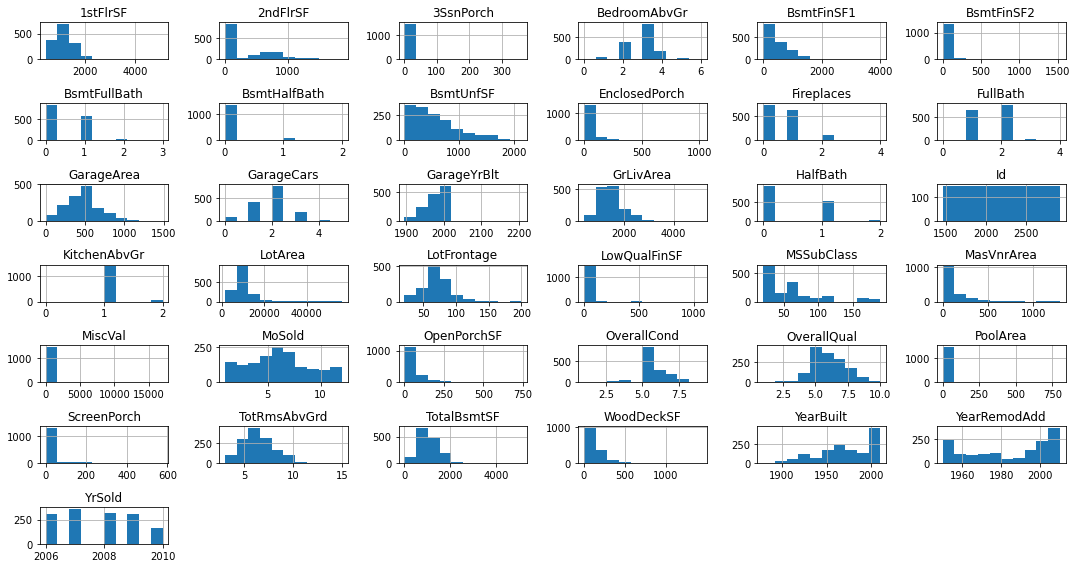

In [206]:
df_numtest.hist()
plt.tight_layout()
plt.show()

In [365]:
from sklearn.impute import SimpleImputer
sim=SimpleImputer(strategy='median')
df_numtest[['GarageYrBlt','LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','GarageYrBlt', 'GarageCars', 'GarageArea']]=sim.fit_transform(df_numtest[['GarageYrBlt','LotFrontage','MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath', 'BsmtHalfBath','GarageYrBlt', 'GarageCars', 'GarageArea']])
#for numerical variables used median to fill in the null values since both are skewed

In [366]:
ab=pd.DataFrame(df_cattest.isnull().sum())
ab[ab[0]>0].index

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [367]:
sim1=SimpleImputer(strategy='most_frequent')
df_cattest[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']]=sim1.fit_transform(df_cattest[['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']])
ind=np.where(df_cattest['FireplaceQu'].isnull())[0]
for i in ind:
    if df_cattest.loc[i,'HeatingQC']=='Gd':
        df_cattest.loc[i,'FireplaceQu']='TA'
    if df_cattest.loc[i,'HeatingQC']=='TA':
        df_cattest.loc[i,'FireplaceQu']='TA'
    else:
        df_cattest.loc[i,'FireplaceQu']='Gd'

In [368]:
df_numtest[['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold','YrSold']]=df_numtest[['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold','YrSold']].astype('object')


In [369]:
df_numtest.dtypes

Id                 int64
MSSubClass        object
LotFrontage      float64
LotArea            int64
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath      object
BsmtHalfBath      object
FullBath          object
HalfBath          object
BedroomAbvGr      object
KitchenAbvGr      object
TotRmsAbvGrd      object
Fireplaces        object
GarageYrBlt       object
GarageCars        object
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold            object
YrSold            object
dtype: object

df_num1=df_numtest.copy()
df_num1['LotArea']=winsorize(df_num1['LotArea'],limits=[0.05,0.05])
df_num1['LotFrontage']=winsorize(df_num1['LotFrontage'],limits=[0.05,0.05])
df_num1['MasVnrArea']=winsorize(df_num1['MasVnrArea'],limits=[0.05,0.05])
df_num1['BsmtFinSF1']=winsorize(df_num1['BsmtFinSF1'],limits=[0.05,0.05])
df_num1['1stFlrSF']=winsorize(df_num1['1stFlrSF'],limits=[0.05,0.05])
df_num1['2ndFlrSF']=winsorize(df_num1['2ndFlrSF'],limits=[0.05,0.05])
df_num1['GrLivArea']=winsorize(df_num1['GrLivArea'],limits=[0.05,0.05])
df_num1['TotalBsmtSF']=winsorize(df_num1['TotalBsmtSF'],limits=[0.05,0.05])
df_num1['GarageArea']=winsorize(df_num1['GarageArea'],limits=[0.05,0.05])
df_num1['WoodDeckSF']=winsorize(df_num1['WoodDeckSF'],limits=[0.05,0.05])
df_num1['OpenPorchSF']=winsorize(df_num1['OpenPorchSF'],limits=[0.05,0.05])
df_num1['EnclosedPorch']=winsorize(df_num1['EnclosedPorch'],limits=[0.05,0.05])

In [370]:
df_numtest[['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold','YrSold']]=df_num1[['MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'GarageYrBlt', 'GarageCars','MoSold','YrSold']].astype('object')
#covert to object

In [371]:
df_price=pd.concat([df_cattest,df_numtest],axis=1)
df_price1=df_price.drop('Id',axis=1)

In [372]:
df_price1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars

In [379]:
df_num=df_price1.select_dtypes(np.number)
df_cat=df_price1.select_dtypes('object')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat.columns:
    df_cat[i]=le.fit_transform(df_cat[i])
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
df_num_1=ss.fit_transform(df_num)
df_num_new=pd.DataFrame(df_num_1,columns=df_num.columns)
df_pri=pd.concat([df_cat,df_num_new],axis=1)

In [215]:
#df_pri.drop('Id',axis=1,inplace=True)
#df_pri.dropna(axis=0,inplace=True)

In [374]:
len(df_pri.columns)

75

In [242]:
cols=list(X.columns)
xtest=df_pri[cols]
gr=GradientBoostingRegressor()
mod=lr.fit(X,Y)
ypred=mod.predict(xtest)


In [350]:
cols=list(X.columns)
xtest=df_pri[cols]
ypred=model.predict(xtest)

In [385]:
a=pd.DataFrame(mm.inverse_transform(ypred),index=df_price['Id'],columns=['SalePrice'])
a.to_csv('final_output_dl.csv')

In [387]:
final_out=pd.DataFrame(mm.inverse_transform([ypred]),index=df_price['Id'])
#final_out.to_csv('final_output_dl.csv')

In [246]:
final_out

0
Id                
1461 147304.296245
1462 191550.190127
1463 205230.517385
1464 201841.952973
1465 197445.920999
1466 203153.260264
1467 191738.723540
1468 169468.300091
1469 167226.472549
1470 115117.315886
1471 240725.683685
1472 115095.037705
1473 143138.742260
1474 152050.475196
1475 130905.514329
1476 334253.036710
1477 191907.601835
1478 252525.799786
1479 249291.938571
1480 424989.403156
1481 281070.311549
1482 217638.656429
1483 191742.886466
1484 162505.436950
1485 210091.649422
1486 198250.057721
1487 314630.379119
1488 217089.008816
1489 173917.609858
1490 211658.878522
1491 198204.009342
1492 137677.872887
1493 144868.654257
1494 299280.736680
1495 284121.342364
1496 225864.021163
1497 181355.079636
1498 168026.988113
1499 122348.106912
1500 171960.613801
1501 226776.906454
1502 152069.116702
1503 237178.394332
1504 214149.333982
1505 242080.114095
1506 210248.462623
1507 290124.027891
1508 155801.687401
1509 158007.997585
1510 149159.344779
1511 177976.244107
1512 176066.513772
1513 208035.528000
1514 175537.464734
1515 230611.441412
1516 188982.098217
1517 217907.406972
1518 158000.766414
1519 228325.506543
1520 135877.339676
1521 172661.638359
1522 212259.612962
1523 146837.579322
1524 162449.519447
1525 142889.362041
1526 138281.650437
1527  86690.422213
1528 150729.902529
1529 189327.467790
1530 157520.235036
1531 156275.163391
1532 107684.430313
1533 125174.822342
1534 124661.135338
1535 168567.812843
1536 119539.677792
1537  45896.635947
1538 133103.113513
1539 201399.111136
1540 172477.975281
1541 170388.143668
1542 169984.524323
1543 202903.822065
1544 126034.490002
1545  99888.470120
1546 116272.326250
1547 111377.945336
1548 112923.554871
1549  92927.658458
1550 129157.036597
1551 137400.594541
1552 150611.077444
1553 167677.151422
1554 135005.752855
1555 196045.547628
1556  90736.810547
1557 150491.032937
1558 105674.518568
1559 157194.662111
1560 158081.320382
1561 165312.523477
1562 146660.317862
1563 137318.989293
1564 211010.288245
1565 145534.825377
1566 204336.814848
1567 108961.274364
1568 248826.759424
1569 171575.454358
1570 137045.190082
1571 141338.600976
1572 164679.736644
1573 271185.890314
1574 141437.300543
1575 209116.198412
1576 222205.432495
1577 200544.257510
1578 155242.485451
1579 162984.417779
1580 152443.342320
1581 163465.366752
1582 121856.412805
1583 278012.549708
1584 228956.643226
1585 156578.833169
1586  63210.005684
1587 115759.301451
1588 167977.685062
1589 153754.612875
1590 143407.933425
1591 108473.643865
1592 178746.383385
1593 119892.837483
1594 202024.856109
1595 129808.300764
1596 203600.077553
1597 232039.471838
1598 189233.024681
1599 133967.652743
1600 175071.539023
1601  52802.174023
1602 139916.171906
1603  45454.528065
1604 256907.146081
1605 222553.457760
1606 175118.666477
1607 203468.121056
1608 183410.914769
1609 177797.871553
1610 198507.601328
1611 140893.676422
1612 227773.805097
1613 166242.048124
1614 134002.976369
1615 113364.240874
1616 125183.446640
1617 123606.753874
1618 140909.552656
1619 152692.505110
1620 253510.326098
1621 178827.861469
1622 150656.832565
1623 240947.228798
1624 187823.412709
1625 140252.445632
1626 208450.558687
1627 206621.697265
1628 295987.049002
1629 164973.217011
1630 326587.065842
1631 211076.705041
1632 220951.099430
1633 173965.397260
1634 200440.899408
1635 180611.016087
1636 146798.743346
1637 259905.939113
1638 179403.481470
1639 168210.168641
1640 262690.582037
1641 181701.041029
1642 246198.753889
1643 203484.440254
1644 290772.069652
1645 225010.891558
1646 149836.597506
1647 135896.838648
1648 165976.344778
1649 187441.054645
1650 140533.857356
1651 131123.924621
1652 119446.552979
1653 109110.791901
1654 151272.930846
1655 152113.447974
1656 155579.985839
1657 136688.414498
1658 180979.105346
1659  85896.230822
1660 168144.533970
1661 391119.606435
1662 320631.873628
1663 339262.893968
1664 393240.586937
1665 269855.114463
1666 297422.371693
1667 343711.709620
1668 305166.873382
1669 264974.426716
1670 324